### __<span style= "color: #87CEEB;"> Feed Forward ANN </span>__

<img src="Images/dmytro-demidko-eBWzFKahEaU-unsplash%20(1).jpg" width="5000"/>

#### <span style = "color: #9fcddfff;"> **About This Project** </span>

- **Core Objective:** Build a binary classifier (feed-forward neural network implemented in Keras/TensorFlow) to predict whether a customer will subscribe to a term deposit.

- **Data Context:** [Bank marketing dataset](https://archive.ics.uci.edu/dataset/222/bank+marketing) (UCI Machine Learning Repository). The dataset contains customer demographics, contact information, campaign details, and the target variable indicating subscription.

- **Approach:** Perform data cleaning, exploratory data analysis, feature engineering, and train a feed-forward ANN. Evaluate performance using accuracy, precision, recall, and AUC on a holdout test set. This architecture has the ability to learn complex, non-linear relationships within the customer data _(which as we may see later on- there might not be a linear relationship between the input data and the prediction of a customer's sucbscription)_.
    - This is a school task requiring only the `Layers` and the `Neurons` hyperparemters to be changed. The rest left constant.
    
    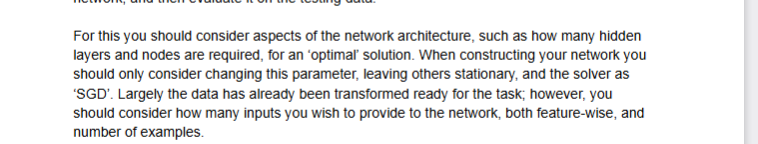

---

### <span style = "color: #9fcddfff;"> **Details of the Dataset** </span>


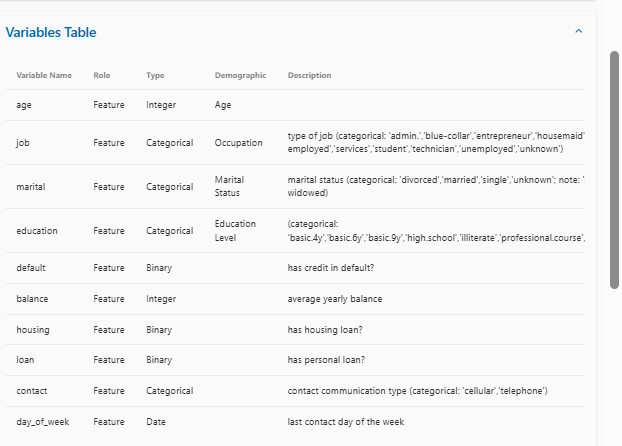 

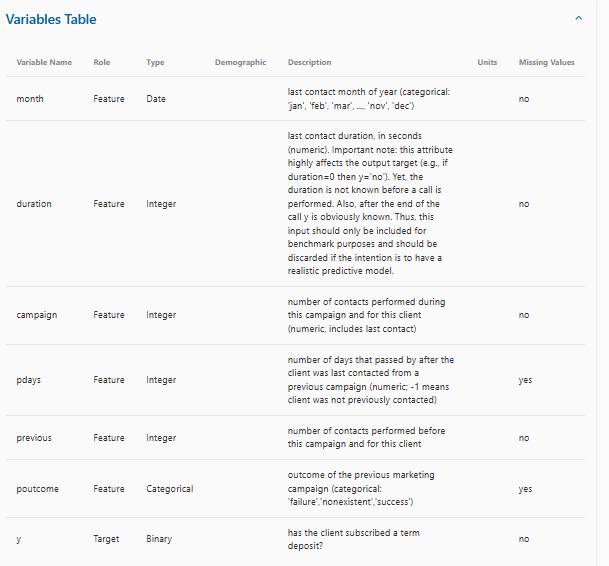

---

#### __<span style= "color: #92bbcaff;"> Import Libraries and Dataset </span>__ 

In [ ]:
#libraies for preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#library for datasplit 
from sklearn.model_selection import train_test_split
#libraries for scaling
from sklearn.preprocessing import RobustScaler, StandardScaler


#libraries needed for the feedforward nodel
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
#Hypertuning
from scikeras.wrappers import KerasClassifier
# GridSearchCV comes from sklearn, not scikeras.model_selection
from sklearn.model_selection import GridSearchCV, train_test_split

#Evaluative Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, precision_recall_curve, f1_score, ConfusionMatrixDisplay, confusion_matrix, balanced_accuracy_score


In [ ]:
df = pd.read_csv(r'Bank.csv')

In [ ]:
df.head()

,age,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,33,1,2,no,882,no,no,1,39,1,151,3,0,no
1,42,0,1,no,-247,yes,yes,1,519,1,166,1,2,yes
2,33,1,1,no,3444,yes,no,1,144,1,91,4,0,yes
3,36,1,2,no,2415,yes,no,1,73,1,86,4,2,no
4,36,1,2,no,0,yes,no,1,140,1,143,3,0,yes


#### __<span style= "color: #92bbcaff;"> Data Exploration </span>__ 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7842 entries, 0 to 7841
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        7842 non-null   int64 
 1   marital    7842 non-null   int64 
 2   education  7842 non-null   int64 
 3   default    7842 non-null   object
 4   balance    7842 non-null   int64 
 5   housing    7842 non-null   object
 6   loan       7842 non-null   object
 7   contact    7842 non-null   int64 
 8   duration   7842 non-null   int64 
 9   campaign   7842 non-null   int64 
 10  pdays      7842 non-null   int64 
 11  previous   7842 non-null   int64 
 12  poutcome   7842 non-null   int64 
 13  y          7842 non-null   object
dtypes: int64(10), object(4)
memory usage: 857.8+ KB


_This confirms no null value, the shape to be `[7842,10]`_

In [ ]:
df.shape

(7842, 14)

In [ ]:
df.shape

(7842, 14)

In [ ]:
def feature_values(df, dropna=True):

    """ 
    This functiion gives a quick glanmcfe at the unique values and number of unique values (with a default settings to 
    drop all null values
     """
    row =[]
    for col in df.columns:
        unique = df[col].dropna().unique() if dropna else df[col].unique()
        n_unique = df[col].nunique(dropna=dropna)
        row.append({"Features": col, "Number of Unique Values": n_unique,"Unique Values": unique})
    return pd.DataFrame(row)
      

In [ ]:
feature_values(df)

,Features,Number of Unique Values,Unique Values
0,age,70,"[33, 42, 36, 44, 26, 51, 30, 34, 49, 47, 40, 3..."
1,marital,3,"[1, 0, 2]"
2,education,3,"[2, 1, 0]"
3,default,2,"[no, yes]"
4,balance,3090,"[882, -247, 3444, 2415, 0, 1324, 172, 3132, 10..."
5,housing,2,"[no, yes]"
6,loan,2,"[no, yes]"
7,contact,2,"[1, 0]"
8,duration,973,"[39, 519, 144, 73, 140, 119, 21, 449, 175, 86,..."
9,campaign,16,"[1, 2, 3, 5, 4, 6, 7, 8, 9, 11, 10, 12, 14, 15..."


#### __<span style= "color: #30bbafff;"> Comments </span>__

<span style= "color: #30bbafff;"> Feature Selection </span>:

The folloiwing features will be deleted because:
-  <span style= "color: #30bbafff;"> Contact </span>: 
From the variable data/table, the unique values of the contact feature is 1 and 0 as seen in the diagram below:
Which will be the case if customers are contacted via cellular or telephone (this means that the method of communication holds no weight in determining whether a customer will make a term deposit or not). Hence, it'd be deleted.

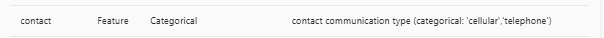


- <span style= "color: #30bbafff ;"> Duration </span>: 
This will also be deleted; as advised, this can only be known after a call has been placed, by which time the y label (if a customer has a term deposit) will already be known, regardless. So, it is not relevant to a predictive model of deciding if a customer will have a term deposit before even contacting them. This is a post-contact variable that leaks information about the outcome (it is recorded only after contact), so dropping it will avoid target leakage.

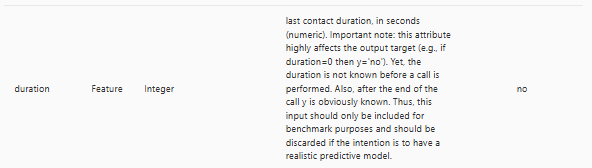


- <span style= "color: #30bbafff ;"> Marital </span>: 
The unique values here are 0,1 and 2. Which are not quite indicative of what the unique values of the metatdata for `Marital status`. Much more, this is a loose feature in determining. Where income, number iof dependants could have held more weight.

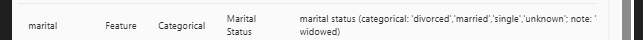


- <span style= "color: #30bbafff ;"> Education </span>: The indexed numbers are 0,1 and 2. Which aren't clearly indicative of the classed categories under the feature `eductaion`. Uneducated people may be successful in brown-collar jobs and still have the caapcity nto mkake tions of money from a non 9-5 job, as much as an educated executive. This is co0nmsidering the current trend and increasing non-linear relationship between education and wealth in today's age.

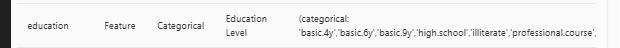




- <span style= "color: #30bbafff ;"> Null Values </span>: There are no null values to address.

### __<span style= "color: #92bbcaff;"> Preprocessing </span>__ 

__Delete Irrelevant Features__

In [ ]:
df.columns

Index(['age', 'marital', 'education', 'default', 'balance', 'housing', 'loan',
       'contact', 'duration', 'campaign', 'pdays', 'previous', 'poutcome',
       'y'],
      dtype='object')

In [ ]:
to_del = ['marital', 'education', 'contact', 'duration']
df.drop(to_del, inplace=True, axis=1)
df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

__Encode Strings__

In [ ]:
feature_values(df)

,Features,Number of Unique Values,Unique Values
0,age,70,"[33, 42, 36, 44, 26, 51, 30, 34, 49, 47, 40, 3..."
1,default,2,"[no, yes]"
2,balance,3090,"[882, -247, 3444, 2415, 0, 1324, 172, 3132, 10..."
3,housing,2,"[no, yes]"
4,loan,2,"[no, yes]"
5,campaign,16,"[1, 2, 3, 5, 4, 6, 7, 8, 9, 11, 10, 12, 14, 15..."
6,pdays,527,"[151, 166, 91, 86, 143, 89, 140, 176, 174, 167..."
7,previous,39,"[3, 1, 4, 2, 16, 6, 5, 10, 12, 7, 18, 9, 8, 11..."
8,poutcome,3,"[0, 2, 1]"
9,y,2,"[no, yes]"


In [ ]:
print(f"The maximum age is {df['age'].max()}")
print(f"The minimum age is {df['age'].min()}")

The maximum age is 89
The minimum age is 18


In [ ]:
cols = ['default', 'housing', 'loan', 'y']
df[cols] = df[cols].replace({"yes": 1, "no": 0})

C:\Users\kojus\AppData\Local\Temp\ipykernel_17776\1974972438.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols] = df[cols].replace({"yes": 1, "no": 0})


In [ ]:
df

,age,default,balance,housing,loan,campaign,pdays,previous,poutcome,y
0,33,0,882,0,0,1,151,3,0,0
1,42,0,-247,1,1,1,166,1,2,1
2,33,0,3444,1,0,1,91,4,0,1
3,36,0,2415,1,0,1,86,4,2,0
4,36,0,0,1,0,1,143,3,0,1
...,...,...,...,...,...,...,...,...,...,...
7837,34,0,1475,1,0,3,530,12,2,0
7838,53,0,583,0,0,1,184,4,1,1
7839,73,0,2850,0,0,1,40,8,0,1
7840,72,0,5715,0,0,5,184,3,1,1


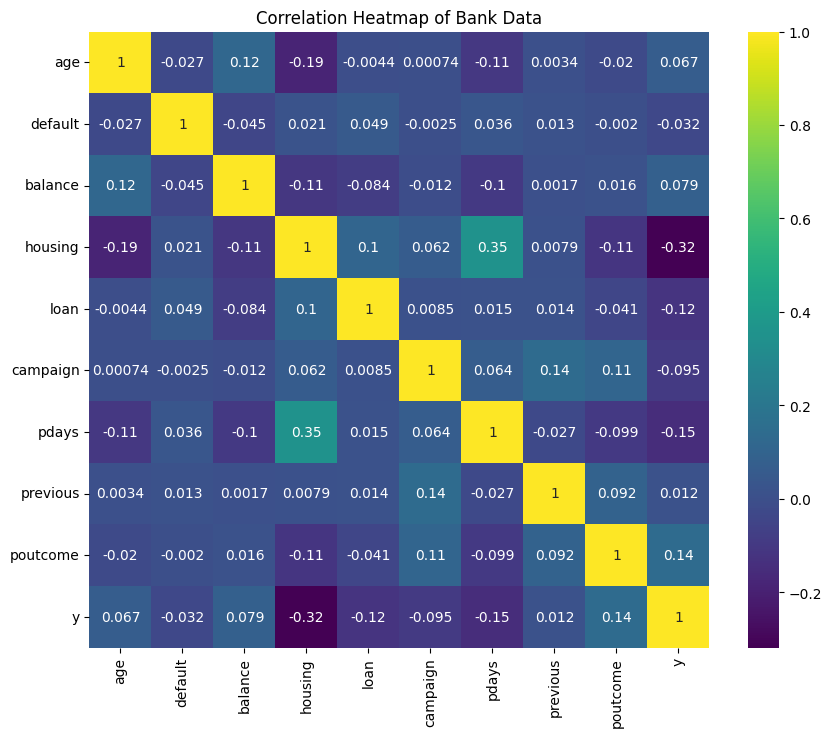

In [ ]:
# To plot a heatmap of the correlation matrix for the dataframe:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='viridis', annot=True)
plt.title('Correlation Heatmap of Bank Data')
plt.show()

__Split Data__

In [ ]:
df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [ ]:
df.shape

(7842, 10)

In [ ]:
x = df.drop('y', axis=1).copy()
y = df['y'].copy()

_Confirm if the categorical label is imbalanced_

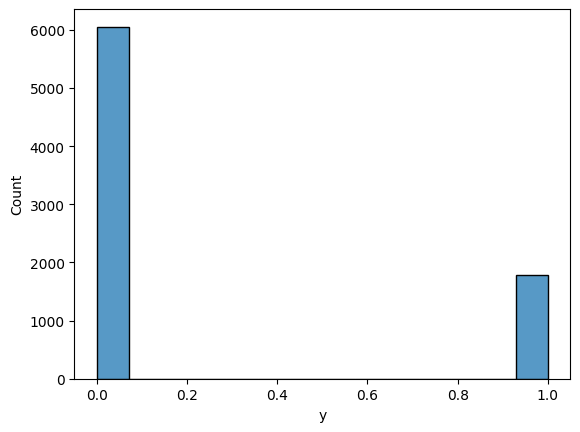

In [ ]:
sns.histplot(y);

In [ ]:
#because the y_label is imbalanced, stratified will used to ensure equal percenatge distribution of the data in both the train and test data

X_temp, X_test, y_temp, y_test = train_test_split(
    x, y, 
    test_size=0.10, 
    random_state=20,
    stratify=y,
    shuffle=True
    )

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, 
    test_size=0.111, 
    random_state=42,
    stratify=y_temp,
    shuffle=True
    )

In [ ]:

original_size = df.shape[0]
print(f"The original data_size is {original_size}")

temp_size = original_size * 0.90

train_size = temp_size * 0.90
print(f"The training sample size is {train_size/original_size:.1%}")

val_size = temp_size * 0.111
print(f"The validation sample size is {val_size/original_size:.1%}")

test_size = original_size * 0.10
print(f"The test sample size is {test_size/original_size:.1%}")



The original data_size is 7842
The training sample size is 81.0%
The validation sample size is 10.0%
The test sample size is 10.0%


In [ ]:
val_tobe_10_percent = 0.10/0.90

#0.10 is the intended percentage
#0.90 is the total data or temp sample size the 10% is to be gotten from

_Quick Outlier Check to confirm which scaler will be used to ensure the range of the numbers are all on the same scale_

In [ ]:
# compute outlier counts per-column on training data
num_train = X_train.select_dtypes(include=[np.number])
q1 = num_train.quantile(0.25)
q3 = num_train.quantile(0.75)

iqr = q3 - q1

upper_bound = q3 + (1.5 * iqr)
lower_bound = q1 - (1.5 * iqr)

outliers = (num_train < lower_bound) | (num_train > upper_bound)
print(outliers.sum().sort_values(ascending=False))

loan        860
campaign    804
balance     618
previous    327
age         153
default      41
pdays        19
housing       0
poutcome      0
dtype: int64


In [ ]:

num_of_rows_with_outliers = outliers.any(axis=1).sum()
length = num_of_rows_with_outliers/len(num_train)

total_outlier_percent = num_of_rows_with_outliers/length

if total_outlier_percent > 0.05:
    scaler = RobustScaler()
    print("using the RobustScaler due to outliers (rows with outliers total {:.2%})".format(length))
else:
    scaler = StandardScaler()
    print("using the RobustScaler due to outliers (rows with outliers total {:.2%})".format(length))



using the RobustScaler due to outliers (rows with outliers total 37.24%)


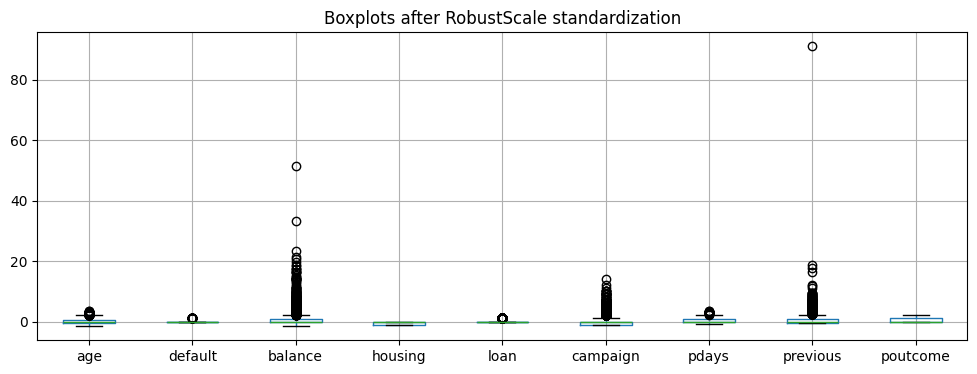

In [ ]:

norm = scaler.fit_transform(num_train)
norm_df = pd.DataFrame(norm, columns=num_train.columns)

plt.figure(figsize=(12,4))
norm_df.boxplot(vert=True)
plt.title('Boxplots after RobustScale standardization')
plt.show()

__Scale X Features__

- The range of the data spreads from 0/1 to ages, up to and beyond, 32. Normalizing brings all the features on the same scale

- _Now transform and fit on the entire x_train dataset; having confirmed there are large outliers and RobustScaler is the scale to use_

In [ ]:

x_train_scaled = scaler.fit_transform(X_train)
x_val_scaled = scaler.transform(X_val)
x_test_scaled = scaler.transform(X_test)

print("Scaling automatically converts the data_type to a numpy array; so there'd be no need for that step")
print(f"\nx_train data_type: {type(X_train)}")
print(f"x_train_scaled data_type: {type(x_train_scaled)}")

#the numpy conversion is sorted

Scaling automatically converts the data_type to a numpy array; so there'd be no need for that step

x_train data_type: <class 'pandas.core.frame.DataFrame'>
x_train_scaled data_type: <class 'numpy.ndarray'>


### __<span style= "color: #92bbcaff;"> Model Architectures </span>__ 


- The models architectures will use the `Sigmoid` output activation because it'd only output 1 feedback
<br>
<br>
- Throughout the model architectures that'd be explored, the `Relu` activation function and the `SGD` Optimizer will be constant (including the learning rate); the only hyperparameters that'd be updated are the `Neurons` and the `Number of Hidden Layers`
<br>
<br>
- __<span style= "color: #92bbcaff;"> Thought Process behind NEURON Updates </span>:__ Based on dataset scale heuristics commonly employed in practical ML, this dataset falls under the medium size. Hence, neurons [64, 32, 16] would mostly be experimented with and the depth would incremetally be expanded:
    - `Small dataset: < 1000 [Neurons: {32, 16, 8}]`
    - `Medium dataset: 1000 - 10000 [Neurons: {64, 32, 16}]`
    - `Large dataset: 10000 - 100000 [Neurons: {128, 64, 32, 16}]`
    - `Very Large dataset: > 100000[Neurons: {256, 128, 64, 32}]`
<br>    _So, the neurons: **[64, 32, 16]** will firstly, and mostly, be explored with across the model architectural types_
<br>
<br>

- __<span style= "color: #92bbcaff;"> Thought Process behind LAYER Updates </span>: Model Architectural types like__; 
    - `Single-layer`_: Shallow Network- Good for starting up the baseline model,_
    - `pyramid architecture`_: Gradually removes irrelevant details, keeps important information,_ 
    - `Constant-Width Architecture`_: It's a relatively shallow netowrk that fits the use-case and size of this data._
      - `Hourglass Architecture`,_: Learnns efficient Data Representation by removing noise while keeping important patters, and_
    - `Diamond Architecture`_:Good for complex interactions, which in our case may be due to the non-lineratity of the varables and the target label_
    <br> <br> 
    - _Only `Inverted-Pyramid Architecture`_: Not the best for simple classification Problems and for a datatset size of this_
    <br> <br> 

- __<span style= "color: #92bbcaff;"> Thought Process behind Chosen METRICS </span>:__
    - Since the prediction is being developed with the objective to predict customers who are likely to 'Term-Deposit'- which invariably contrubutes to the profit of the Bank; it'd be costly to miss any 'likely customers' who could have deposited _(FN)_, it's better to have more _(FP)_ who may eventually be convinced after a call from the team. To this end, `Recall` will be a major metric in assessing the model with the best performance or higest recall score.


In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] =  '3'

In [ ]:
X_train.shape

(6273, 9)

__<span style= "color: #92bbcaff;"> BASELINE MODEL </span>__ 

- __Thought process behind the basline build: According to the _`Hands-On ML with Scikit-Learn, and TensorFlow Textbook- by Aurelien Geron [Chapter 10; Fine-tuning Neural Network Hyperparamters]`_, a simpe baseline is defined by how sahllow or not-so-deep the netowrk or layer is. However, the neurons could be high signalling. As he metioned a model could have 2 layers totalling 100 neurons with an accuracy of 98%, while a model with 1 layer and having 100 neurons could have an accuracy score of 97%.__.....reference link..

In [ ]:
baseline_model_A = keras.Sequential([
    layers.InputLayer(input_shape=(9,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
], name='baseline_relu_64')

baseline_model_A.summary();

baseline_model_A.compile(optimizer='SGD',
                       metrics=['accuracy'],
                       loss='binary_crossentropy')

baseline_model_history_A = baseline_model_A.fit(x_train_scaled, y_train,
                                            validation_data=(x_val_scaled, y_val),
                                            epochs=100)

c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "baseline_relu_64"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 705 (2.75 KB)

 Trainable params: 705 (2.75 KB)

 Non-trainable params: 0 (0.00 B)

-----

Evaluative Metric


NameError: name 'baseline_model_B' is not defined

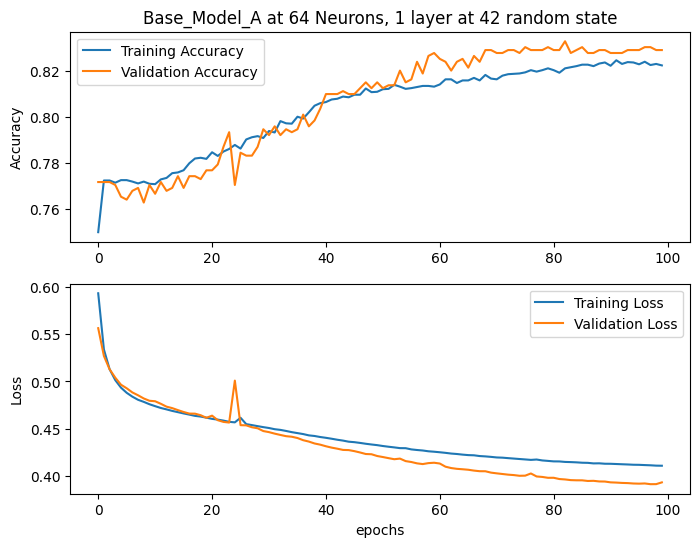

In [ ]:
for key in baseline_model_history_A.history.keys():
    print(key)

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

acc = baseline_model_history_A.history['accuracy']
loss = baseline_model_history_A.history['loss']

val_acc = baseline_model_history_A.history['val_accuracy']
val_loss = baseline_model_history_A.history['val_loss']

ax1.plot(acc, label='Training Accuracy')
ax1.plot(val_acc, label='Validation Accuracy')

ax2.plot(loss, label='Training Loss')
ax2.plot(val_loss, label='Validation Loss')

ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Loss')
 
ax2.set_xlabel('epochs')

ax1.legend()
ax2.legend()

ax1.set_title('Base_Model_A at 64 Neurons, 1 layer at 42 random state')

print('-----')

print('\nEvaluative Metric')

y_pred_prob = baseline_model_A.predict(x_val_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)



recall_val = recall_score(y_val, y_pred)
accuracy_val = balanced_accuracy_score(y_val, y_pred)
f1_val = f1_score(y_val, y_pred)
precision_val = precision_score(y_val, y_pred)

print(f'The Balanced Accuracy Score is {accuracy_val}')
print(f'The Recall Score is {recall_val}')
print(f'The F1 Score is {f1_val}')
print(f'The Precision Score is {precision_val}')

precision_recall_curve(y_val, y_pred_prob)



25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
The Accuracy Score is 0.8329
The Recall Score is 0.4246
The F1 Score is 0.5371
The Precision Score is 0.7308


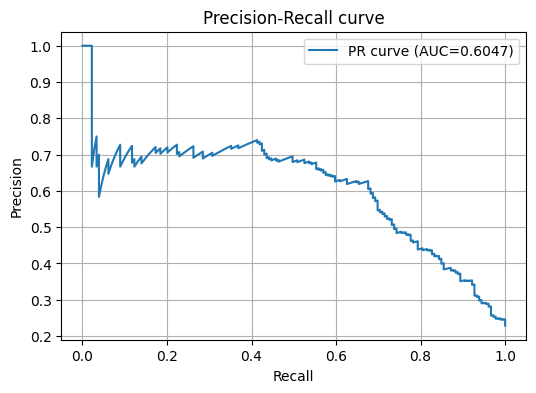

In [ ]:

from sklearn.metrics import auc


y_pred_prob = baseline_model_history_A.predict(x_val_scaled)
# reshape & threshold
y_pred_prob = np.asarray(y_pred_prob).reshape(-1)
if y_pred_prob.dtype.kind in 'f':
    y_pred = (y_pred_prob >= 0.5).astype(int)
else:
    y_pred = y_pred_prob.astype(int)

recall_val = recall_score(y_val, y_pred)
accuracy_val = accuracy_score(y_val, y_pred)
f1_val = f1_score(y_val, y_pred)
precision_val = precision_score(y_val, y_pred)

print(f'The Accuracy Score is {accuracy_val:.4f}')
print(f'The Recall Score is {recall_val:.4f}')
print(f'The F1 Score is {f1_val:.4f}')
print(f'The Precision Score is {precision_val:.4f}')

# Precision-Recall curve (use probabilities)
precision_vals, recall_vals, thresholds = precision_recall_curve(y_val, y_pred_prob)
pr_auc = auc(recall_vals, precision_vals)

plt.figure(figsize=(6,4))
plt.plot(recall_vals, precision_vals, label=f'PR curve (AUC={pr_auc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.grid(True)
plt.show()



Text(0.5, 1.0, 'Confusion Matrix for Base_Model_B at 64 Neurons, 1 layer at 42 random state')

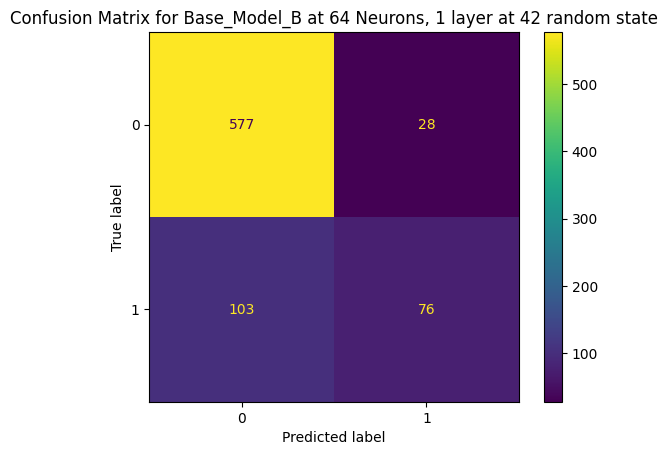

In [ ]:
a  = ConfusionMatrixDisplay.from_predictions(y_val, np.round(y_pred))
plt.title('Confusion Matrix for Base_Model_B at 64 Neurons, 1 layer at 42 random state')

Text(0.5, 1.0, 'Confusion Matrix for Base_Model_B at 64 Neurons, 1 layer at 42 random state')

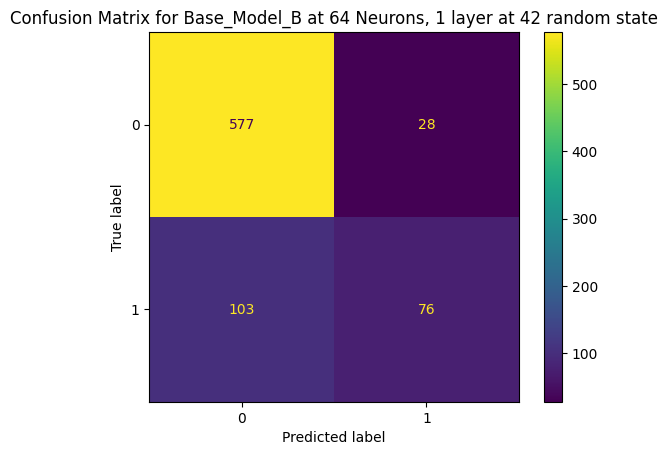

In [ ]:
cm = confusion_matrix(y_val, np.round(y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
#title('Confusion Matrix for Base_Model_A at 64 Neurons, 1 layer at 42 random state')
plt.title('Confusion Matrix for Base_Model_B at 64 Neurons, 1 layer at 42 random state')

_Comment on the graph:_

- The smooth, monotonic improvement in both loss and accuracy strongly suggests that the learning rate was well-chosen. However, the graph suggests `Underfitting` as the point of diverence wasnt reached. _The slope is very steep -0whuch is mostly an indication of a low `learning rate`_
Other possible reasosn for the Underfit could be:
    - the `layers` aren't deep enough (more of this will be xplored subsequenlty)
    - The `neuron` used wasn't sufficient enough (This could be experienmneted with)
    - The `number of epoch` wasnt high enough to ensure complete training and a point of divergence
    - To increase the `learning rate`- possibly.

- The next model will experiemnet for:
    - an epoch size of 250 from 100
    - A learning rate from 0.01 to 0.1
    - The option of a larger neuron with 64 and 128

#### **RANDOM STATES**

Testing Random State: 0


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


RS 0: Val_Acc=0.8227, Val_Loss=0.4052, Recall=0.3966
Testing Random State: 20


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


RS 20: Val_Acc=0.8202, Val_Loss=0.4117, Recall=0.4246
Testing Random State: 42


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


RS 42: Val_Acc=0.8138, Val_Loss=0.4533, Recall=0.3799
Testing Random State: 123


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


RS 123: Val_Acc=0.8112, Val_Loss=0.4414, Recall=0.3911
Testing Random State: 456


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


RS 456: Val_Acc=0.8316, Val_Loss=0.4030, Recall=0.4078
Testing Random State: 789


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


RS 789: Val_Acc=0.8074, Val_Loss=0.4301, Recall=0.3911


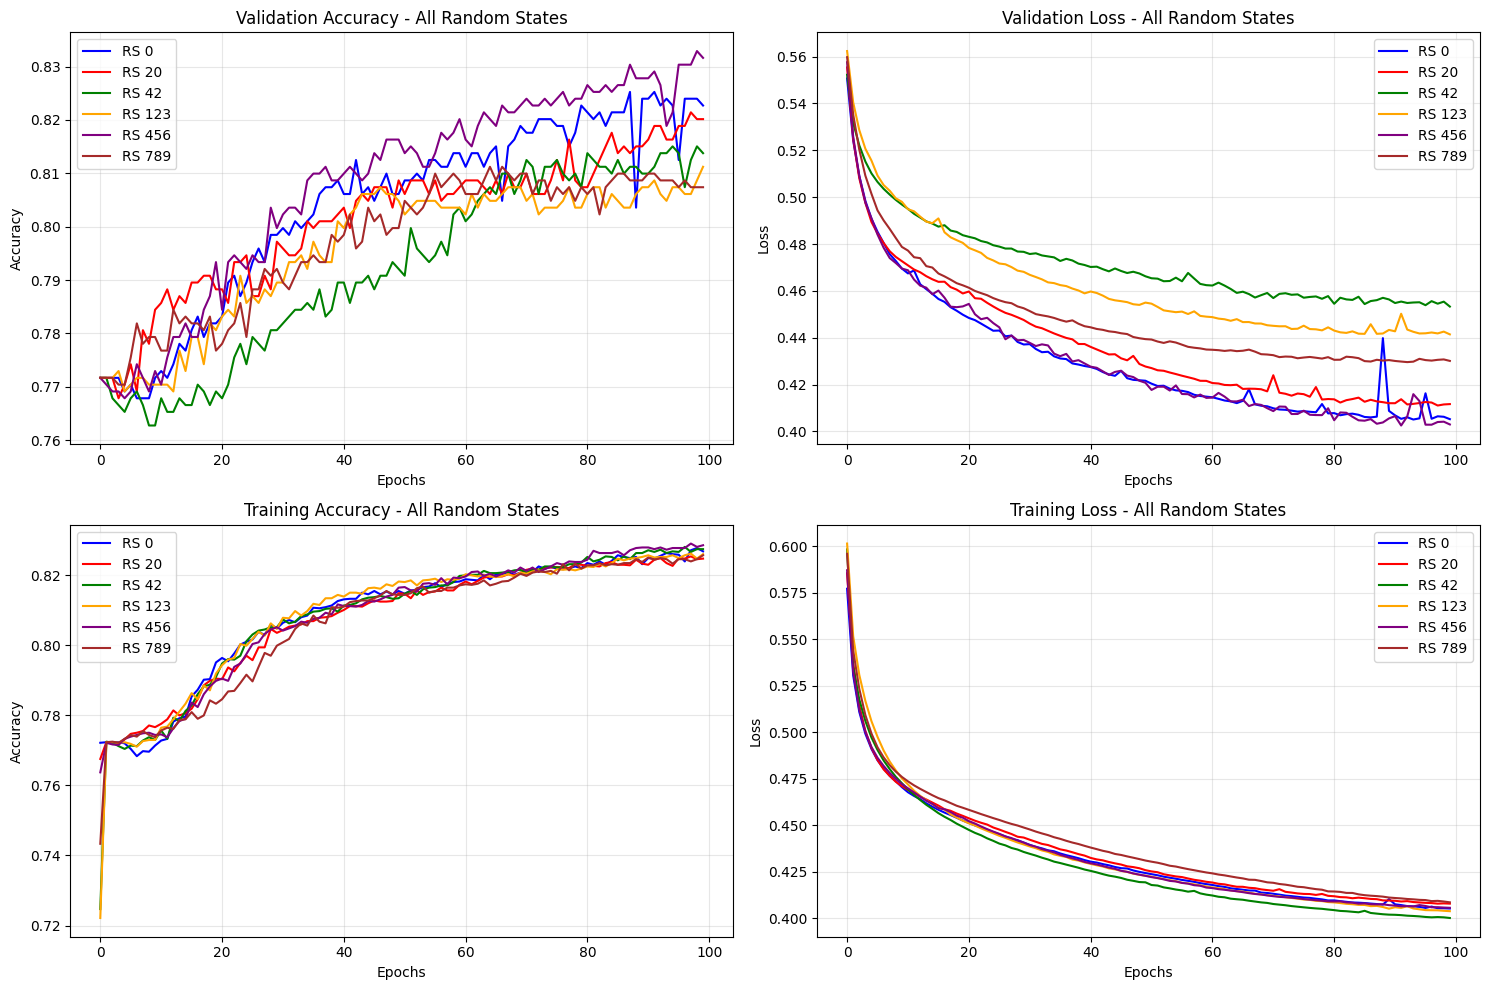

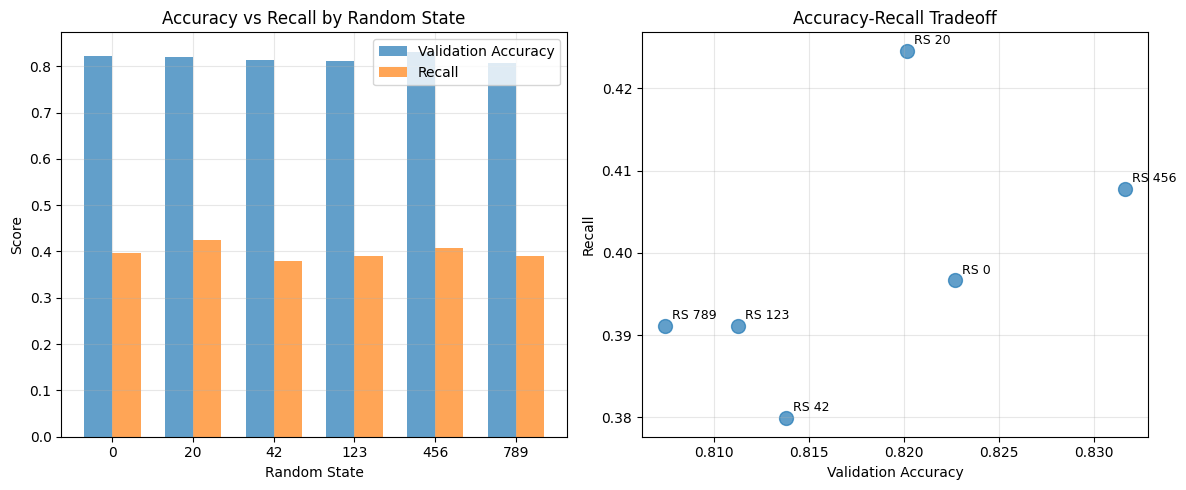


FINAL COMPARISON ACROSS RANDOM STATES:
RS     Val_Acc  Val_Loss Recall  
----------------------------------------
0      0.8227   0.4052   0.3966
20     0.8202   0.4117   0.4246
42     0.8138   0.4533   0.3799
123    0.8112   0.4414   0.3911
456    0.8316   0.4030   0.4078
789    0.8074   0.4301   0.3911

Average Val Accuracy: 0.8178 ± 0.0080
Average Recall: 0.3985 ± 0.0143
Accuracy Range: 0.8074 - 0.8316
Recall Range: 0.3799 - 0.4246


In [29]:
# Test different random splits
random_states = [0, 20, 42, 123, 456, 789]
split_results = []

for r in random_states:
    print(f'Testing Random State: {r}')

    X_temp, X_test, y_temp, y_test = train_test_split(x, y, test_size=0.10, random_state=r, stratify=y, shuffle=True)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.111, random_state=r, stratify=y_temp, shuffle=True)

    x_train_scaled = scaler.fit_transform(X_train)
    x_val_scaled = scaler.transform(X_val)
    x_test_scaled = scaler.transform(X_test)

    model = keras.Sequential([
        layers.InputLayer(input_shape=(9,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='SGD', metrics=['accuracy'], loss='binary_crossentropy')

    history = model.fit(x_train_scaled, y_train, epochs=100, validation_data=(x_val_scaled, y_val), verbose=0)
    val_loss, val_accuracy = model.evaluate(x_val_scaled, y_val, verbose=0)

    # Calculate recall
    y_pred_prob = model.predict(x_val_scaled, verbose=0)
    y_pred = (y_pred_prob > 0.5).astype(int)
    recall = recall_score(y_val, y_pred)

    # Get last epoch's metrics
    acc = history.history['accuracy'][-1]
    loss = history.history['loss'][-1]

    split_results.append({
        'random_state': r,
        'val_accuracy': val_accuracy,
        'val_loss': val_loss,
        'loss': loss,
        'accuracy': acc,
        'recall': recall,
        'history': history.history
    })

    print(f'RS {r}: Val_Acc={val_accuracy:.4f}, Val_Loss={val_loss:.4f}, Recall={recall:.4f}')

# Plot 1: All random states - Accuracy comparison
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']

# Plot all validation accuracies
for i, result in enumerate(split_results):
    ax1.plot(result['history']['val_accuracy'], label=f'RS {result["random_state"]}', color=colors[i])
    ax2.plot(result['history']['val_loss'], label=f'RS {result["random_state"]}', color=colors[i])
    ax3.plot(result['history']['accuracy'], label=f'RS {result["random_state"]}', color=colors[i])
    ax4.plot(result['history']['loss'], label=f'RS {result["random_state"]}', color=colors[i])

ax1.set_title('Validation Accuracy - All Random States')
ax2.set_title('Validation Loss - All Random States')
ax3.set_title('Training Accuracy - All Random States')
ax4.set_title('Training Loss - All Random States')

for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlabel('Epochs')
    ax.legend()
    ax.grid(True, alpha=0.3)

ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Loss')
ax3.set_ylabel('Accuracy')
ax4.set_ylabel('Loss')

plt.tight_layout()
plt.show()

# Plot 2: Final metrics comparison across random states
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Extract final metrics
random_states = [r['random_state'] for r in split_results]
val_accuracies = [r['val_accuracy'] for r in split_results]
recalls = [r['recall'] for r in split_results]

# Bar plot for accuracy and recall
x_pos = np.arange(len(random_states))
width = 0.35

ax1.bar(x_pos - width/2, val_accuracies, width, label='Validation Accuracy', alpha=0.7)
ax1.bar(x_pos + width/2, recalls, width, label='Recall', alpha=0.7)
ax1.set_xlabel('Random State')
ax1.set_ylabel('Score')
ax1.set_title('Accuracy vs Recall by Random State')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(random_states)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Scatter plot: Accuracy vs Recall
ax2.scatter(val_accuracies, recalls, s=100, alpha=0.7)
ax2.set_xlabel('Validation Accuracy')
ax2.set_ylabel('Recall')
ax2.set_title('Accuracy-Recall Tradeoff')
for i, rs in enumerate(random_states):
    ax2.annotate(f'RS {rs}', (val_accuracies[i], recalls[i]), xytext=(5, 5), 
                textcoords='offset points', fontsize=9)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print final comparison table
print("\n" + "="*60)
print("FINAL COMPARISON ACROSS RANDOM STATES:")
print("="*60)
print(f"{'RS':<6} {'Val_Acc':<8} {'Val_Loss':<8} {'Recall':<8}")
print("-" * 40)
for result in split_results:
    print(f"{result['random_state']:<6} {result['val_accuracy']:.4f}   {result['val_loss']:.4f}   {result['recall']:.4f}")

# Calculate variability
avg_acc = np.mean(val_accuracies)
std_acc = np.std(val_accuracies)
avg_recall = np.mean(recalls)
std_recall = np.std(recalls)

print(f"\nAverage Val Accuracy: {avg_acc:.4f} ± {std_acc:.4f}")
print(f"Average Recall: {avg_recall:.4f} ± {std_recall:.4f}")
print(f"Accuracy Range: {min(val_accuracies):.4f} - {max(val_accuracies):.4f}")
print(f"Recall Range: {min(recalls):.4f} - {max(recalls):.4f}")

Testing Random State: 0


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Val Accuracy for the random state 0 is val_accuracy 0.8214, and the loss 0.4068, the training result is loss: 0.4060 and acc: 0.8251
Testing Random State: 20


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Val Accuracy for the random state 20 is val_accuracy 0.8163, and the loss 0.4160, the training result is loss: 0.4092 and acc: 0.8245
Testing Random State: 42


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Val Accuracy for the random state 42 is val_accuracy 0.8087, and the loss 0.4530, the training result is loss: 0.4003 and acc: 0.8274
Testing Random State: 123


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Val Accuracy for the random state 123 is val_accuracy 0.8036, and the loss 0.4390, the training result is loss: 0.4057 and acc: 0.8266
Testing Random State: 456


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Val Accuracy for the random state 456 is val_accuracy 0.8278, and the loss 0.4033, the training result is loss: 0.4067 and acc: 0.8253
Testing Random State: 789


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Val Accuracy for the random state 789 is val_accuracy 0.8099, and the loss 0.4277, the training result is loss: 0.4067 and acc: 0.8253
RS   0: Acc=0.8214
RS  20: Acc=0.8163
RS  42: Acc=0.8087
RS 123: Acc=0.8036
RS 456: Acc=0.8278
RS 789: Acc=0.8099
-----

Evaluative Metric
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
The Recall Score is 0.4022346368715084


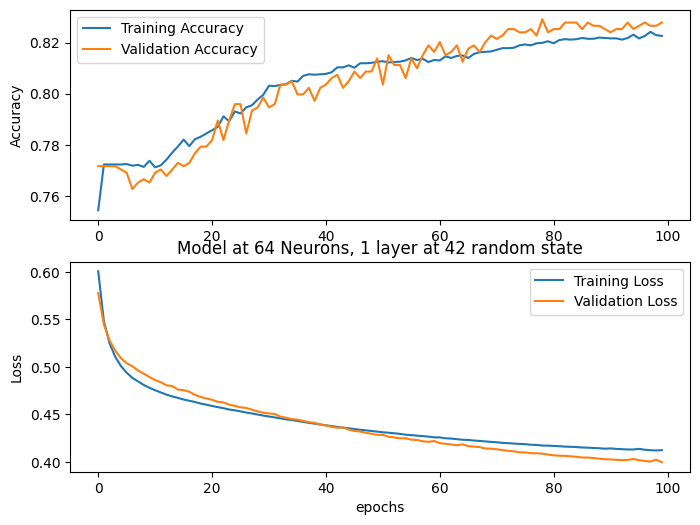

In [ ]:
#diff random splits:

random_states = [0, 20, 42, 123, 456, 789]

split_results = []

for r in random_states:
    print(f'Testing Random State: {r}')

    X_temp, X_test, y_temp, y_test = train_test_split(x, y, test_size=0.10, random_state=r, stratify=y, shuffle=True)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.111, random_state=r, stratify=y_temp, shuffle=True)

    x_train_scaled = scaler.fit_transform(X_train)
    x_val_scaled = scaler.transform(X_val)
    x_test_scaled = scaler.transform(X_test)

    model = keras.Sequential([
        layers.InputLayer(input_shape=(9,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='SGD', metrics=['accuracy'], loss='binary_crossentropy')

    history = model.fit(x_train_scaled, y_train, epochs=100, validation_data=(x_val_scaled, y_val), verbose=0)
    val_loss, val_accuracy = model.evaluate(x_val_scaled, y_val, verbose=0)

    # Get last epoch's training accuracy and loss
    acc = history.history['accuracy'][-1]
    loss = history.history['loss'][-1]

    split_results.append({
        'random_state': r,
        'val_accuracy': val_accuracy,
        'val_loss': val_loss,
        'loss': loss,
        'accuracy': acc,
        'history': history.history
    })

    print(f'Val Accuracy for the random state {r} is val_accuracy {val_accuracy:.4f}, and the loss {val_loss:.4f}, the training result is loss: {loss:.4f} and acc: {acc:.4f}')

for result in split_results:
    print(f"RS {result['random_state']:3}: Acc={result['val_accuracy']:.4f}")


best_result = max(split_results, key=lambda x: x['val_accuracy'])
best_random_state = best_result['random_state']
print(f"\nBest Random State: {best_random_state} with Val Accuracy: {best_result['val_accuracy']:.4f}")

print('-----')

print('\nEvaluative Metric')

y_pred_prob = model.predict(x_val_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

recall = recall_score(y_val, y_pred)
print(f'The Recall Score is {recall}')

### __<span style= "color: #92bbcaff;"> Higher Single-layer Neurons </span>__ 

In [ ]:
#because the y_label is imbalanced, stratified will used to ensure equal percenatge distribution of the data in both the train and test data

X_temp, X_test, y_temp, y_test = train_test_split(
    x, y, 
    test_size=0.10, 
    random_state=20,
    stratify=y,
    shuffle=True
    )

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, 
    test_size=0.111, 
    random_state=42,
    stratify=y_temp,
    shuffle=True
    )

x_train_scaled = scaler.fit_transform(X_train)
x_val_scaled = scaler.transform(X_val)
x_test_scaled = scaler.transform(X_test)

print("Scaling automatically converts the data_type to a numpy array; so there'd be no need for that step")
print(f"\nx_train data_type: {type(X_train)}")
print(f"x_train_scaled data_type: {type(x_train_scaled)}")

#the numpy conversion is sorted

=== Training Individual Models ===

--- Training model with 16 neurons ---


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Completed training for 16 neurons

--- Training model with 32 neurons ---


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Completed training for 32 neurons

--- Training model with 64 neurons ---


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Completed training for 64 neurons

--- Training model with 128 neurons ---


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Completed training for 128 neurons

=== Confusion Matrices ===
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


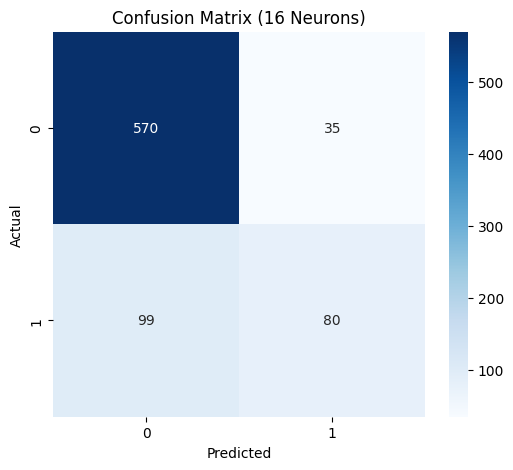

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


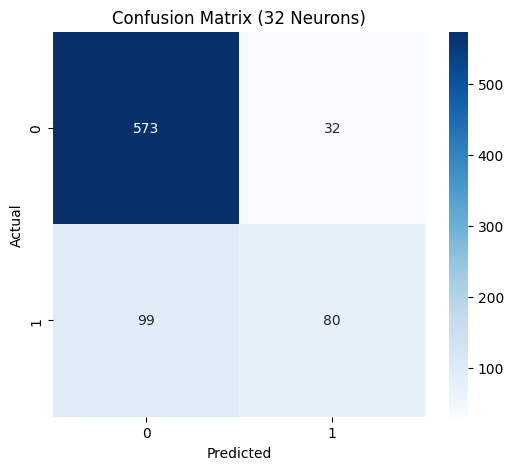

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


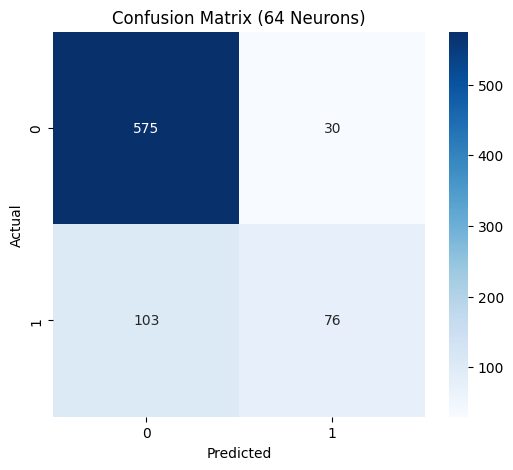

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


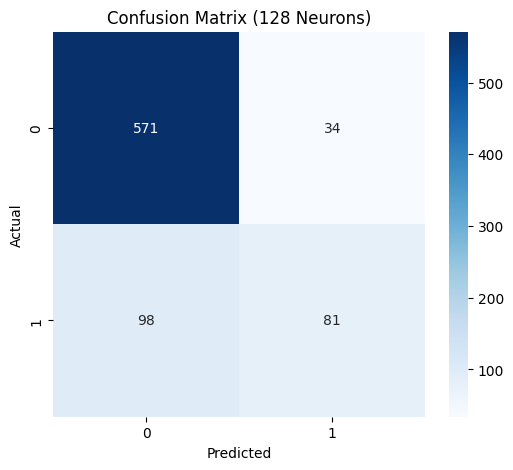


=== Performance Metrics ===

--- 16 Neurons ---
Balanced Accuracy: 0.6945
Recall: 0.4469
F1 Score: 0.5442
Precision: 0.6957
Final Training Loss: 0.4141
Final Validation Loss: 0.3959

--- 32 Neurons ---
Balanced Accuracy: 0.6970
Recall: 0.4469
F1 Score: 0.5498
Precision: 0.7143
Final Training Loss: 0.4107
Final Validation Loss: 0.3952

--- 64 Neurons ---
Balanced Accuracy: 0.6875
Recall: 0.4246
F1 Score: 0.5333
Precision: 0.7170
Final Training Loss: 0.4085
Final Validation Loss: 0.3931

--- 128 Neurons ---
Balanced Accuracy: 0.6982
Recall: 0.4525
F1 Score: 0.5510
Precision: 0.7043
Final Training Loss: 0.4076
Final Validation Loss: 0.3924

=== BEST MODEL ===
Best model: 128 neurons
Best Balanced Accuracy: 0.6982


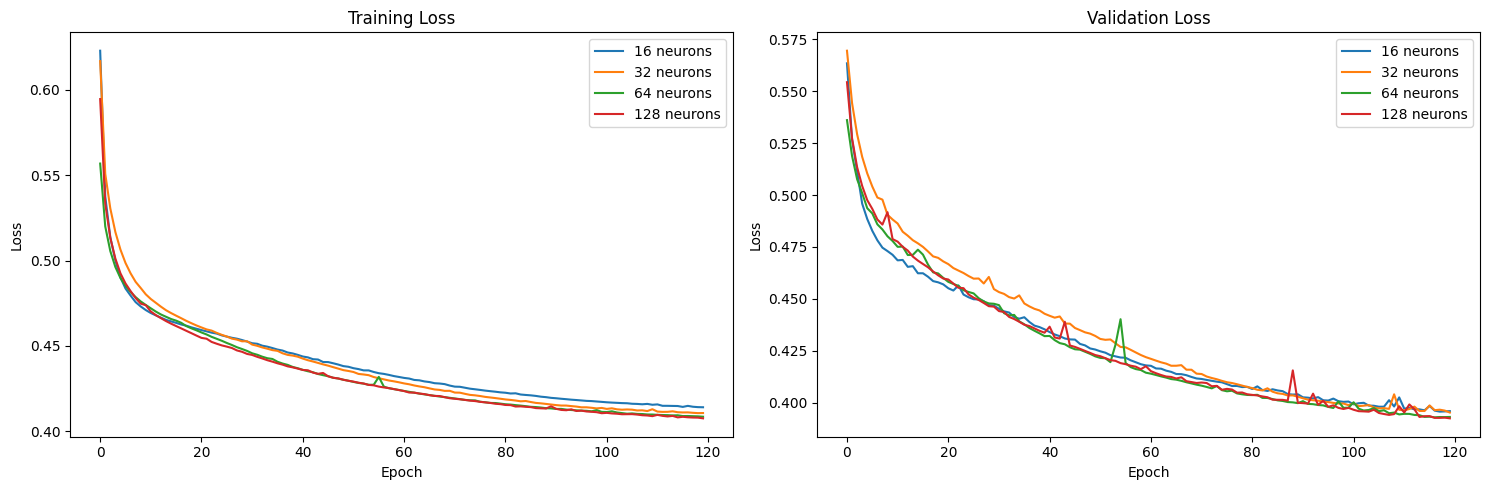

In [ ]:
def create_model(neurons):
    """Create a single-layer neural network model"""
    model = keras.Sequential([
        layers.InputLayer(input_shape=(9,)),
        layers.Dense(neurons, activation='relu'),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return model

def show_confusion(model, x_val, y_val, labels=[0,1], title_suffix=''):
    """Display confusion matrix for a model"""
    y_pred = (model.predict(x_val) > 0.5).astype(int)
    cm = confusion_matrix(y_val, y_pred)
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix{title_suffix}')
    plt.show()

# Define neurons to test
neurons = [16, 32, 64, 128]

# Store all results
results = {}
histories = {}

print("=== Training Individual Models ===")

for n in neurons:
    print(f"\n--- Training model with {n} neurons ---")
    
    # Create and train model
    model = create_model(n)
    history = model.fit(x_train_scaled, y_train, 
                       epochs=120, 
                       validation_data=(x_val_scaled, y_val),
                       verbose=0)
    
    # Store history for plotting
    histories[n] = history
    
    # Get predictions
    y_pred = (model.predict(x_val_scaled) > 0.5).astype(int)
    
    # Calculate metrics
    results[n] = {
        'model': model,
        'y_pred': y_pred,
        'recall': recall_score(y_val, y_pred),
        'balanced_accuracy': balanced_accuracy_score(y_val, y_pred),
        'f1': f1_score(y_val, y_pred),
        'precision': precision_score(y_val, y_pred),
        'final_train_loss': history.history['loss'][-1],
        'final_val_loss': history.history['val_loss'][-1]
    }
    
    print(f"Completed training for {n} neurons")

# Display confusion matrices
print("\n=== Confusion Matrices ===")
for n in neurons:
    show_confusion(results[n]['model'], x_val_scaled, y_val, 
                   labels=[0,1], title_suffix=f' ({n} Neurons)')

# Print all metrics
print("\n=== Performance Metrics ===")
for n in neurons:
    print(f"\n--- {n} Neurons ---")
    print(f"Balanced Accuracy: {results[n]['balanced_accuracy']:.4f}")
    print(f"Recall: {results[n]['recall']:.4f}")
    print(f"F1 Score: {results[n]['f1']:.4f}")
    print(f"Precision: {results[n]['precision']:.4f}")
    print(f"Final Training Loss: {results[n]['final_train_loss']:.4f}")
    print(f"Final Validation Loss: {results[n]['final_val_loss']:.4f}")

# Find best model based on balanced accuracy
best_neurons = max(results.keys(), key=lambda x: results[x]['balanced_accuracy'])
print(f"\n=== BEST MODEL ===")
print(f"Best model: {best_neurons} neurons")
print(f"Best Balanced Accuracy: {results[best_neurons]['balanced_accuracy']:.4f}")

# Plot training history comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
for n in neurons:
    plt.plot(histories[n].history['loss'], label=f'{n} neurons')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
for n in neurons:
    plt.plot(histories[n].history['val_loss'], label=f'{n} neurons')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### **Might Delete**

In [ ]:
def create_model_with_history(neurons):
    model_baseline_ABC = keras.Sequential([
        layers.InputLayer(input_shape=(9,)),
        layers.Dense(neurons, activation='relu'),
        layers.Dense(1, activation="sigmoid")
    ])
    model_baseline_ABC.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return model_baseline_ABC


neurons = [16, 32, 64, 128]

model_baseline_ABC = KerasClassifier(build_fn=create_model_with_history, neurons=neurons, epochs=120)

param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model_baseline_ABC, param_grid=param_grid, n_jobs=-1)

grid_result = grid.fit(x_train_scaled, y_train)
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

#predict all neurons
y_pred_16 = grid.predict(x_val_scaled)
y_pred_32 = grid.predict(x_val_scaled)
y_pred_64 = grid.predict(x_val_scaled)  
y_pred_128 = grid.predict(x_val_scaled)

#plot loss and accuracy for the neurons
show_confusion(grid, x_val_scaled, y_val, labels=[0,1], title_suffix=' (16 Neurons)')
show_confusion(grid, x_val_scaled, y_val, labels=[0,1], title_suffix=' (32 Neurons)')
show_confusion(grid, x_val_scaled, y_val, labels=[0,1], title_suffix=' (64 Neurons)')
show_confusion(grid, x_val_scaled, y_val, labels=[0,1], title_suffix=' (128 Neurons)')


#print recall, balanced_accuracy, f1score, and confusion matrix display for the neurons.
recall_16 = recall_score(y_val, y_pred_16)
balanced_accuracy_score_16 = balanced_accuracy_score(y_val, y_pred_16)
f1_16 = f1_score(y_val, y_pred_16)
precision_16 = precision_score(y_val, y_pred_16)

recall_32 = recall_score(y_val, y_pred_32)
balanced_accuracy_score_32 = balanced_accuracy_score(y_val, y_pred_32)
f1_32 = f1_score(y_val, y_pred_32)
precision_32 = precision_score(y_val, y_pred_32)

recall_64 = recall_score(y_val, y_pred_64)
balanced_accuracy_score_64 = balanced_accuracy_score(y_val, y_pred_64)
f1_64 = f1_score(y_val, y_pred_64)
precision_64 = precision_score(y_val, y_pred_64)

recall_128 = recall_score(y_val, y_pred_128)
balanced_accuracy_score_128 = balanced_accuracy_score(y_val, y_pred_128)
f1_128 = f1_score(y_val, y_pred_128)
precision_128 = precision_score(y_val, y_pred_128)

print(f'The Balanced Accuracy Score for 16 neurons is {balanced_accuracy_score_16}')
print(f'The Recall Score for 16 neurons is {recall_16}')
print(f'The F1 Score for 16 neurons is {f1_16}')
print(f'The Precision Score for 16 neurons is {precision_16}')
print('-----')
print(f'The Balanced Accuracy Score for 32 neurons is {balanced_accuracy_score_32}')
print(f'The Recall Score for 32 neurons is {recall_32}')
print(f'The F1 Score for 32 neurons is {f1_32}')
print(f'The Precision Score for 32 neurons is {precision_32}')
print('-----')
print(f'The Balanced Accuracy Score for 64 neurons is {balanced_accuracy_score_64}')
print(f'The Recall Score for 64 neurons is {recall_64}')
print(f'The F1 Score for 64 neurons is {f1_64}')
print(f'The Precision Score for 64 neurons is {precision_64}')
print('-----')
print(f'The Balanced Accuracy Score for 128 neurons is {balanced_accuracy_score_128}')
print(f'The Recall Score for 128 neurons is {recall_128}')
print(f'The F1 Score for 128 neurons is {f1_128}')
print(f'The Precision Score for 128 neurons is {precision_128}')



In [ ]:
# A table to view the model's perfomance of these neurons where theyre titled single_baseline_model A for 64, B for 32, C for 16 and D for 128,  [128, 64, 32, 16]
# iD LIKE TO VIEW A TABLE WITH THE MODEL name or title diferentaited bythe nasme (eg; Single Layer (128 Neurons) another column for the accuracy score on validation and trainuing, l;oss vakluye on training and vgaluidation and the recall score, and the training time
# basicall view the % of recall, precision, f1 score and balanced accuracy as this is an imbalanced data


import pandas as pd 
results = {
    'Model': ['Single Layer (16 Neurons)', 'Single Layer (32 Neurons)', 'Single Layer (64 Neurons)', 'Single Layer (128 Neurons)'],
    'Validation Accuracy': [balanced_accuracy_score_16, balanced_accuracy_score_32, balanced_accuracy_score_64, balanced_accuracy_score_128],
    'Validation Recall': [recall_16, recall_32, recall_64, recall_128],
    'Validation F1 Score': [f1_16, f1_32, f1_64, f1_128],
    'Validation Precision': [precision_16, precision_32, precision_64, precision_128]
}   
results_df = pd.DataFrame(results)
print(results_df)



In [ ]:
def create_model_with_history(neurons):
    model = keras.Sequential([
        layers.InputLayer(input_shape=(9,)),
        layers.Dense(neurons, activation='relu'),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return model

# Test each neuron count individually to get history
histories = {}
for neurons in [128, 64]:
    print(f"Training with {neurons} neurons...")
    model = create_model_with_history(neurons)
    history = model.fit(x_train_scaled, y_train, 
                       epochs=250, 
                       validation_data=(x_val_scaled, y_val),
                       verbose=0)
    histories[neurons] = history.history

#recall
y_pred_prob = model.predict(x_val_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)
recall = recall_score(y_val, y_pred)
print(f'The Recall Score is {recall}')     

# Separate training and validation into different subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Training Accuracy
for neurons, history in histories.items():
    ax1.plot(history['accuracy'], label=f'{neurons} neurons', linewidth=2)
ax1.set_title('Training Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Validation Accuracy
for neurons, history in histories.items():
    ax2.plot(history['val_accuracy'], label=f'{neurons} neurons', linewidth=2)
ax2.set_title('Validation Accuracy', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Training Loss
for neurons, history in histories.items():
    ax3.plot(history['loss'], label=f'{neurons} neurons', linewidth=2)
ax3.set_title('Training Loss', fontsize=14, fontweight='bold')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Loss')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Validation Loss
for neurons, history in histories.items():
    ax4.plot(history['val_loss'], label=f'{neurons} neurons', linewidth=2)
ax4.set_title('Validation Loss', fontsize=14, fontweight='bold')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Loss')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "baseline_relu_64"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 705 (2.75 KB)

 Trainable params: 705 (2.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7424 - loss: 0.6047 - val_accuracy: 0.7717 - val_loss: 0.5619
Epoch 2/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7724 - loss: 0.5615 - val_accuracy: 0.7717 - val_loss: 0.5502
Epoch 3/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7724 - loss: 0.5516 - val_accuracy: 0.7717 - val_loss: 0.5453
Epoch 4/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7724 - loss: 0.5474 - val_accuracy: 0.7717 - val_loss: 0.5427
Epoch 5/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7724 - loss: 0.5447 - val_accuracy: 0.7717 - val_loss: 0.5417
Epoch 6/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7724 - loss: 0.5427 - val_accuracy: 0.7717 - val_loss: 0.5405
Epoch 7/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7724 - loss: 0.5414 - val_accuracy: 0.7717 - val_loss: 0.5407
Epoch 8/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7725 - loss: 0.5402 - val_accu

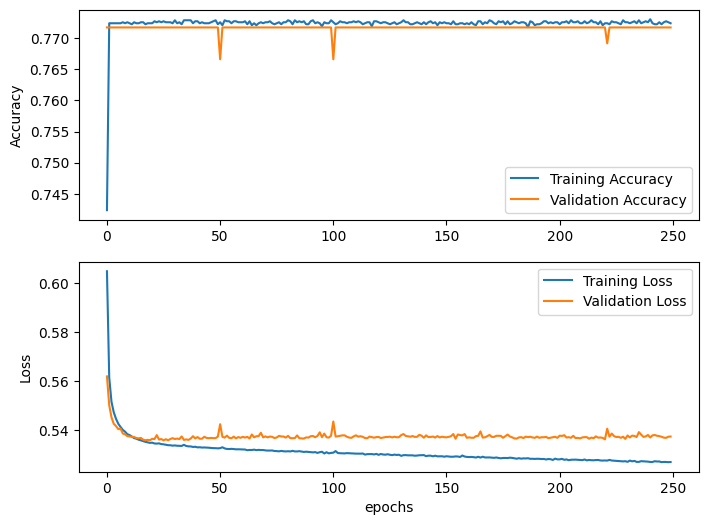

In [34]:
baseline_model_1 = keras.Sequential([
    layers.InputLayer(input_shape=(9,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
], name='baseline_relu_64')

baseline_model_1.summary();



baseline_model_1.compile(optimizer='SGD',
                       metrics=['accuracy'],
                       loss='binary_crossentropy')




baseline_model_history_1 = baseline_model_1.fit(x_train_scaled, y_train,
                                            validation_data=(x_val_scaled, y_val),
                                            epochs=250)

#---


fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

acc = baseline_model_history_1.history['accuracy']
loss = baseline_model_history_1.history['loss']

val_acc = baseline_model_history_1.history['val_accuracy']
val_loss = baseline_model_history_1.history['val_loss']

ax1.plot(acc, label='Training Accuracy')
ax1.plot(val_acc, label='Validation Accuracy')

ax2.plot(loss, label='Training Loss')
ax2.plot(val_loss, label='Validation Loss')

ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Loss')

ax2.set_xlabel('epochs')

ax1.legend()
ax2.legend()



print('-----')

print('\nEvaluative Metric')

y_pred_prob = baseline_model.predict(x_val_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

recall = recall_score(y_val, y_pred)
print(f'The Recall Score is {recall}')




Even though the only changed hyperpameter was the epoch, the lines shows the model performed poorly, it didnt reach a point of divergence, yte it spiked.

c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "baseline_relu_64"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 128)            │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,409 (5.50 KB)

 Trainable params: 1,409 (5.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7378 - loss: 0.5991 - val_accuracy: 0.7717 - val_loss: 0.5545
Epoch 2/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7724 - loss: 0.5537 - val_accuracy: 0.7717 - val_loss: 0.5455
Epoch 3/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7724 - loss: 0.5482 - val_accuracy: 0.7717 - val_loss: 0.5427
Epoch 4/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7724 - loss: 0.5451 - val_accuracy: 0.7717 - val_loss: 0.5432
Epoch 5/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7724 - loss: 0.5433 - val_accuracy: 0.7717 - val_loss: 0.5415
Epoch 6/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7724 - loss: 0.5420 - val_accuracy: 0.7717 - val_loss: 0.5403
Epoch 7/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7724 - loss: 0.5412 - val_accuracy: 0.7704 - val_loss: 0.5435
Epoch 8/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7725 - loss: 0.5402 - val_accu

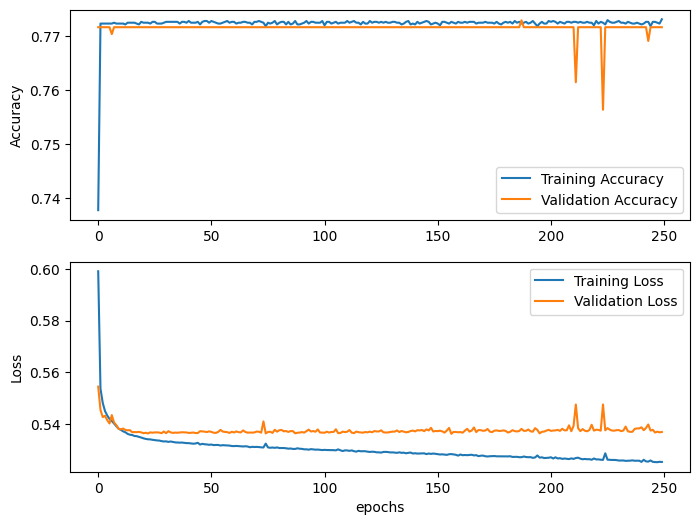

In [35]:
baseline_model_1 = keras.Sequential([
    layers.InputLayer(input_shape=(9,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
], name='baseline_relu_64')

baseline_model_1.summary();



baseline_model_1.compile(optimizer='SGD',
                       metrics=['accuracy'],
                       loss='binary_crossentropy')




baseline_model_history_1 = baseline_model_1.fit(x_train_scaled, y_train,
                                            validation_data=(x_val_scaled, y_val),
                                            epochs=250)

#---


fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

acc = baseline_model_history_1.history['accuracy']
loss = baseline_model_history_1.history['loss']

val_acc = baseline_model_history_1.history['val_accuracy']
val_loss = baseline_model_history_1.history['val_loss']

ax1.plot(acc, label='Training Accuracy')
ax1.plot(val_acc, label='Validation Accuracy')

ax2.plot(loss, label='Training Loss')
ax2.plot(val_loss, label='Validation Loss')

ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Loss')

ax2.set_xlabel('epochs')

ax1.legend()
ax2.legend()



print('-----')

print('\nEvaluative Metric')

y_pred_prob = baseline_model.predict(x_val_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

recall = recall_score(y_val, y_pred)
print(f'The Recall Score is {recall}')




__Looping through the list of Neurons[32,16] to find the best neuron- for a Single-Layered Network__

Training with 32 neurons...


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Training with 16 neurons...
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
The Recall Score is 0.0


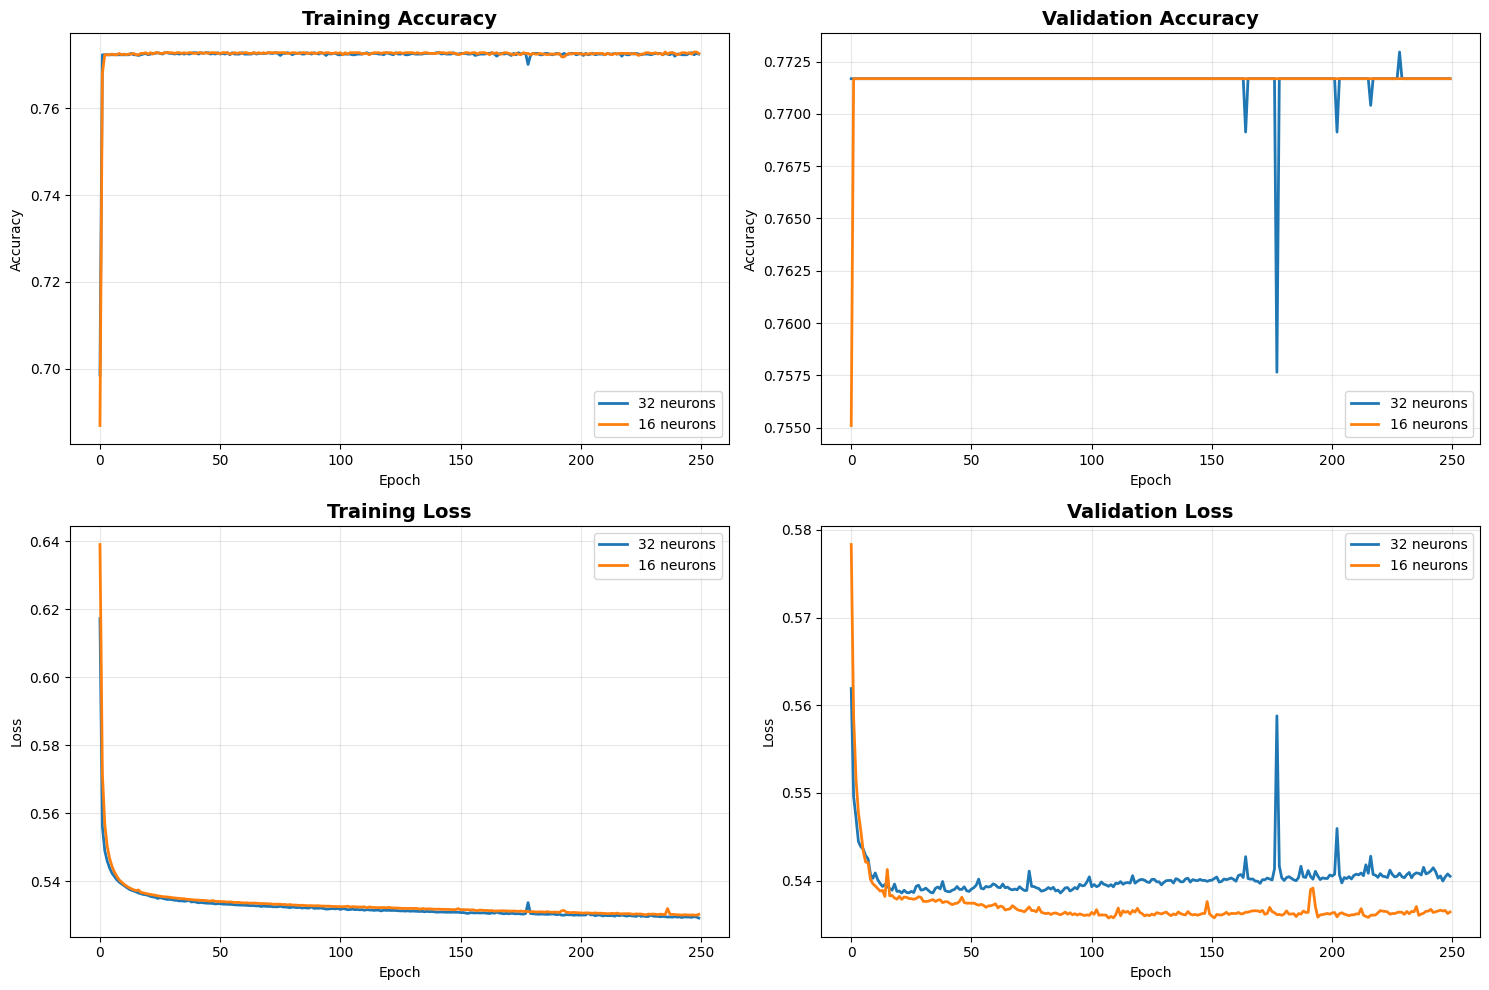

In [36]:
def create_model_with_history(neurons):
    model = tf.keras.Sequential()
    model.add(layers.InputLayer(input_shape=(9,)))
    model.add(layers.Dense(neurons, activation='relu'))
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return model

# Test each neuron count individually to get history
histories = {}
for neurons in [32, 16]:
    print(f"Training with {neurons} neurons...")
    model = create_model_with_history(neurons)
    history = model.fit(x_train_scaled, y_train, 
                       epochs=250, 
                       validation_data=(x_val_scaled, y_val),
                       verbose=0)
    histories[neurons] = history.history

#recall
y_pred_prob = model.predict(x_val_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)
recall = recall_score(y_val, y_pred)
print(f'The Recall Score is {recall}')     

# Separate training and validation into different subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Training Accuracy
for neurons, history in histories.items():
    ax1.plot(history['accuracy'], label=f'{neurons} neurons', linewidth=2)
ax1.set_title('Training Accuracy', fontsize=14, fontweight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Validation Accuracy
for neurons, history in histories.items():
    ax2.plot(history['val_accuracy'], label=f'{neurons} neurons', linewidth=2)
ax2.set_title('Validation Accuracy', fontsize=14, fontweight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Training Loss
for neurons, history in histories.items():
    ax3.plot(history['loss'], label=f'{neurons} neurons', linewidth=2)
ax3.set_title('Training Loss', fontsize=14, fontweight='bold')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Loss')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Validation Loss
for neurons, history in histories.items():
    ax4.plot(history['val_loss'], label=f'{neurons} neurons', linewidth=2)
ax4.set_title('Validation Loss', fontsize=14, fontweight='bold')
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Loss')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "baseline_relu_64"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 32)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 353 (1.38 KB)

 Trainable params: 353 (1.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6801 - loss: 0.6356 - val_accuracy: 0.7717 - val_loss: 0.5631
Epoch 2/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7724 - loss: 0.5576 - val_accuracy: 0.7717 - val_loss: 0.5485
Epoch 3/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7724 - loss: 0.5489 - val_accuracy: 0.7717 - val_loss: 0.5449
Epoch 4/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7722 - loss: 0.5450 - val_accuracy: 0.7717 - val_loss: 0.5420
Epoch 5/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7724 - loss: 0.5424 - val_accuracy: 0.7717 - val_loss: 0.5402
Epoch 6/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7724 - loss: 0.5410 - val_accuracy: 0.7717 - val_loss: 0.5406
Epoch 7/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7724 - loss: 0.5399 - val_accuracy: 0.7717 - val_loss: 0.5397
Epoch 8/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7725 - loss: 0.5391 - val_accu

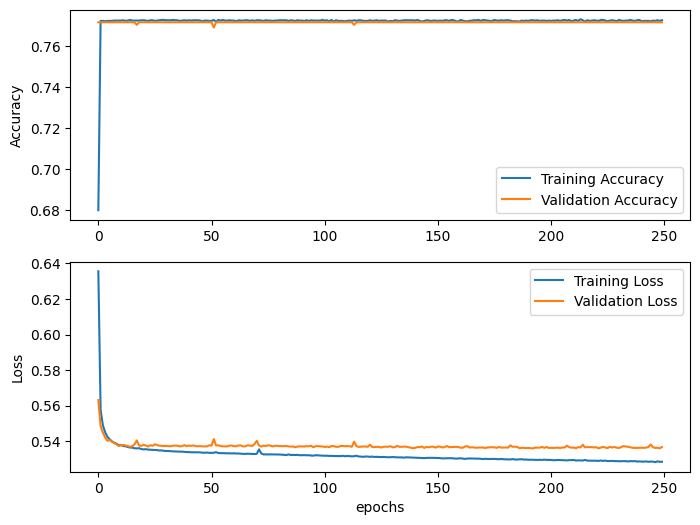

In [37]:
baseline_model_1 = keras.Sequential([
    layers.InputLayer(input_shape=(9,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
], name='baseline_relu_64')

baseline_model_1.summary();



baseline_model_1.compile(optimizer='SGD',
                       metrics=['accuracy'],
                       loss='binary_crossentropy')




baseline_model_history_1 = baseline_model_1.fit(x_train_scaled, y_train,
                                            validation_data=(x_val_scaled, y_val),
                                            epochs=250)

#---


fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

acc = baseline_model_history_1.history['accuracy']
loss = baseline_model_history_1.history['loss']

val_acc = baseline_model_history_1.history['val_accuracy']
val_loss = baseline_model_history_1.history['val_loss']

ax1.plot(acc, label='Training Accuracy')
ax1.plot(val_acc, label='Validation Accuracy')

ax2.plot(loss, label='Training Loss')
ax2.plot(val_loss, label='Validation Loss')

ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Loss')

ax2.set_xlabel('epochs')

ax1.legend()
ax2.legend()



print('-----')

print('\nEvaluative Metric')

y_pred_prob = baseline_model.predict(x_val_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

recall = recall_score(y_val, y_pred)
print(f'The Recall Score is {recall}')




c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "baseline_relu_64"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_44 (Dense)                │ (None, 16)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177 (708.00 B)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7488 - loss: 0.5977 - val_accuracy: 0.7717 - val_loss: 0.5586
Epoch 2/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7717 - loss: 0.5717 - val_accuracy: 0.7717 - val_loss: 0.5527
Epoch 3/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7724 - loss: 0.5614 - val_accuracy: 0.7717 - val_loss: 0.5466
Epoch 4/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7724 - loss: 0.5551 - val_accuracy: 0.7717 - val_loss: 0.5463
Epoch 5/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7724 - loss: 0.5511 - val_accuracy: 0.7717 - val_loss: 0.5441
Epoch 6/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7724 - loss: 0.5481 - val_accuracy: 0.7717 - val_loss: 0.5426
Epoch 7/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7724 - loss: 0.5459 - val_accuracy: 0.7717 - val_loss: 0.5436
Epoch 8/250
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7724 - loss: 0.5449 - val_accu

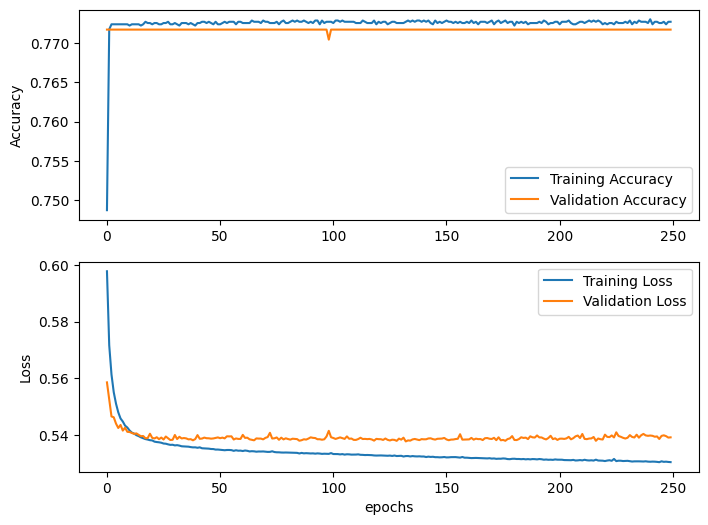

In [38]:
baseline_model_1 = keras.Sequential([
    layers.InputLayer(input_shape=(9,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
], name='baseline_relu_64')

baseline_model_1.summary();



baseline_model_1.compile(optimizer='SGD',
                       metrics=['accuracy'],
                       loss='binary_crossentropy')




baseline_model_history_1 = baseline_model_1.fit(x_train_scaled, y_train,
                                            validation_data=(x_val_scaled, y_val),
                                            epochs=250)

#---


fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

acc = baseline_model_history_1.history['accuracy']
loss = baseline_model_history_1.history['loss']

val_acc = baseline_model_history_1.history['val_accuracy']
val_loss = baseline_model_history_1.history['val_loss']

ax1.plot(acc, label='Training Accuracy')
ax1.plot(val_acc, label='Validation Accuracy')

ax2.plot(loss, label='Training Loss')
ax2.plot(val_loss, label='Validation Loss')

ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Loss')

ax2.set_xlabel('epochs')

ax1.legend()
ax2.legend()



print('-----')

print('\nEvaluative Metric')

y_pred_prob = baseline_model.predict(x_val_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

recall = recall_score(y_val, y_pred)
print(f'The Recall Score is {recall}')

print(f'Accuracy score is {acc}')


__<span style= "color: #92bbcaff;"> Observation on the Model Performance: </span>__ 

- xxx
- Lorep Ipsum

----

### __<span style= "color: #92bbcaff;"> PYRAMID ARCHITECTURE </span>__ 

In [ ]:
# Test all pyramid combinations
pyramids = {
    'pyr_64_32': [64, 32],
    'pyr_64_16': [64, 16], 
    'pyr_32_16': [32, 16],
    'pyr_64_32_16': [64, 32, 16]
}

print("PYRAMID ARCHITECTURE PERFORMANCE:")
print("=" * 70)

# Store all results
all_histories = []
all_metrics = []

for name, neurons in pyramids.items():
    print(f"\nTesting {name}: {neurons}")
    
    # Build model - FIXED: Use InputLayer to avoid warning
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(9,)))  # FIXED
    model.add(tf.keras.layers.Dense(neurons[0], activation='relu'))
    for units in neurons[1:]:
        model.add(tf.keras.layers.Dense(units, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train model
    history = model.fit(x_train_scaled, y_train, epochs=100, verbose=0, 
                       validation_data=(x_val_scaled, y_val))
    
    # Get final training and validation metrics from history
    final_train_loss = history.history['loss'][-1]        # ADDED
    final_train_acc = history.history['accuracy'][-1]     # ADDED
    final_val_loss = history.history['val_loss'][-1]      # ADDED
    final_val_acc = history.history['val_accuracy'][-1]   # ADDED
    
    # Also get metrics from evaluate (for comparison)
    val_loss, val_acc = model.evaluate(x_val_scaled, y_val, verbose=0)
    
    # Calculate metrics
    y_pred_prob = model.predict(x_val_scaled, verbose=0)
    y_pred = (y_pred_prob > 0.5).astype(int)
    recall = recall_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, zero_division=0)
    f1 = f1_score(y_val, y_pred, zero_division=0)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Store results
    all_histories.append(history.history)
    all_metrics.append({
        'name': name,
        'neurons': neurons,
        'final_train_loss': final_train_loss,    # ADDED
        'final_train_acc': final_train_acc,      # ADDED
        'final_val_loss': final_val_loss,        # ADDED
        'final_val_acc': final_val_acc,          # ADDED
        'evaluate_val_loss': val_loss,           # For comparison
        'evaluate_val_acc': val_acc,             # For comparison
        'recall': recall,
        'precision': precision,
        'f1_score': f1,
        'confusion_matrix': cm,
        'tp': tp, 'fp': fp, 'tn': tn, 'fn': fn
    })
    
    # UPDATED PRINT WITH BOTH TRAINING AND VALIDATION LOSS
    print(f"Final Training Loss: {final_train_loss:.4f} | Final Validation Loss: {final_val_loss:.4f}")
    print(f"Final Training Acc: {final_train_acc:.4f} | Final Validation Acc: {final_val_acc:.4f}")
    print(f"Metrics -> Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f}")
    print(f"Confusion Matrix:")
    print(f"                Predicted 0   Predicted 1")
    print(f"Actual 0        TN: {tn:<6}      FP: {fp:<6}")
    print(f"Actual 1        FN: {fn:<6}      TP: {tp:<6}")
    print("-" * 50)

# Print final comparison WITH BOTH LOSSES
print("\n" + "=" * 100)
print("FINAL COMPARISON:")
print("=" * 100)
print(f"{'Model':<15} {'Train Loss':<12} {'Val Loss':<12} {'Train Acc':<10} {'Val Acc':<10} {'Precision':<9} {'Recall':<8} {'F1':<8}")
print("-" * 100)
for metrics in all_metrics:
    print(f"{metrics['name']:<15} {metrics['final_train_loss']:.4f}      {metrics['final_val_loss']:.4f}      "
          f"{metrics['final_train_acc']:.4f}     {metrics['final_val_acc']:.4f}     "
          f"{metrics['precision']:.4f}     {metrics['recall']:.4f}   {metrics['f1_score']:.4f}")

# Print detailed confusion matrices summary
print("\n" + "=" * 80)
print("DETAILED CONFUSION MATRICES:")
print("=" * 80)
for metrics in all_metrics:
    print(f"\n{metrics['name']} (Neurons: {metrics['neurons']}):")
    print(f"  Training Loss: {metrics['final_train_loss']:.4f} | Validation Loss: {metrics['final_val_loss']:.4f}")
    print(f"  Training Acc: {metrics['final_train_acc']:.4f} | Validation Acc: {metrics['final_val_acc']:.4f}")
    print(f"  True Negatives (TN): {metrics['tn']} | False Positives (FP): {metrics['fp']}")
    print(f"  False Negatives (FN): {metrics['fn']} | True Positives (TP): {metrics['tp']}")
    print(f"  Default Detection Rate: {metrics['recall']:.1%}")

# Plot training progress
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Training Loss
for i, (name, history_dict) in enumerate(zip(pyramids.keys(), all_histories)):
    ax1.plot(history_dict['loss'], label=f"{name}", linewidth=2)
ax1.set_ylabel('Training Loss')
ax1.set_xlabel('Epochs')
ax1.set_title('Training Loss Over Epochs')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Validation Loss
for i, (name, history_dict) in enumerate(zip(pyramids.keys(), all_histories)):
    ax2.plot(history_dict['val_loss'], label=f"{name}", linewidth=2)
ax2.set_ylabel('Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_title('Validation Loss Over Epochs')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Training Accuracy
for i, (name, history_dict) in enumerate(zip(pyramids.keys(), all_histories)):
    ax3.plot(history_dict['accuracy'], label=f"{name}", linewidth=2)
ax3.set_ylabel('Training Accuracy')
ax3.set_xlabel('Epochs')
ax3.set_title('Training Accuracy Over Epochs')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Validation Accuracy
for i, (name, history_dict) in enumerate(zip(pyramids.keys(), all_histories)):
    ax4.plot(history_dict['val_accuracy'], label=f"{name}", linewidth=2)
ax4.set_ylabel('Validation Accuracy')
ax4.set_xlabel('Epochs')
ax4.set_title('Validation Accuracy Over Epochs')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.suptitle('Pyramid Architectures - Training Progress', fontsize=16)
plt.tight_layout()
plt.show()

PYRAMID ARCHITECTURE PERFORMANCE:

Testing pyr_64_32: [64, 32]


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Final Training Loss: 0.3995 | Final Validation Loss: 0.4565
Final Training Acc: 0.8294 | Final Validation Acc: 0.8061
Metrics -> Precision: 0.5692 | Recall: 0.6201 | F1: 0.5936
Confusion Matrix:
                Predicted 0   Predicted 1
Actual 0        TN: 521         FP: 84    
Actual 1        FN: 68          TP: 111   
--------------------------------------------------

Testing pyr_64_16: [64, 16]


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Final Training Loss: 0.4021 | Final Validation Loss: 0.3859
Final Training Acc: 0.8280 | Final Validation Acc: 0.8380
Metrics -> Precision: 0.6970 | Recall: 0.5140 | F1: 0.5916
Confusion Matrix:
                Predicted 0   Predicted 1
Actual 0        TN: 565         FP: 40    
Actual 1        FN: 87          TP: 92    
--------------------------------------------------

Testing pyr_32_16: [32, 16]


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Final Training Loss: 0.4030 | Final Validation Loss: 0.3851
Final Training Acc: 0.8301 | Final Validation Acc: 0.8342
Metrics -> Precision: 0.7025 | Recall: 0.4749 | F1: 0.5667
Confusion Matrix:
                Predicted 0   Predicted 1
Actual 0        TN: 569         FP: 36    
Actual 1        FN: 94          TP: 85    
--------------------------------------------------

Testing pyr_64_32_16: [64, 32, 16]


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


PYRAMID ARCHITECTURE PERFORMANCE:

Testing pyr_64_32: [64, 32]


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Final Training Loss: 0.4016 | Final Validation Loss: 0.3882
Final Training Acc: 0.8285 | Final Validation Acc: 0.8355
Metrics -> Precision: 0.7119 | Recall: 0.4693 | F1: 0.5657
Confusion Matrix:
                Predicted 0   Predicted 1
Actual 0        TN: 571         FP: 34    
Actual 1        FN: 95          TP: 84    
--------------------------------------------------

Testing pyr_64_16: [64, 16]


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Final Training Loss: 0.4038 | Final Validation Loss: 0.3913
Final Training Acc: 0.8286 | Final Validation Acc: 0.8367
Metrics -> Precision: 0.7257 | Recall: 0.4581 | F1: 0.5616
Confusion Matrix:
                Predicted 0   Predicted 1
Actual 0        TN: 574         FP: 31    
Actual 1        FN: 97          TP: 82    
--------------------------------------------------

Testing pyr_32_16: [32, 16]


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Final Training Loss: 0.4076 | Final Validation Loss: 0.3904
Final Training Acc: 0.8254 | Final Validation Acc: 0.8393
Metrics -> Precision: 0.7190 | Recall: 0.4860 | F1: 0.5800
Confusion Matrix:
                Predicted 0   Predicted 1
Actual 0        TN: 571         FP: 34    
Actual 1        FN: 92          TP: 87    
--------------------------------------------------

Testing pyr_64_32_16: [64, 32, 16]


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Final Training Loss: 0.3934 | Final Validation Loss: 0.4019
Final Training Acc: 0.8307 | Final Validation Acc: 0.8329
Metrics -> Precision: 0.7264 | Recall: 0.4302 | F1: 0.5404
Confusion Matrix:
                Predicted 0   Predicted 1
Actual 0        TN: 576         FP: 29    
Actual 1        FN: 102         TP: 77    
--------------------------------------------------

FINAL COMPARISON:
Model           Train Loss Val Loss   Train Acc  Val Acc    Precision  Recall   F1      
----------------------------------------------------------------------------------------------------
pyr_64_32       0.4016    0.3882    0.8285     0.8355     0.7119      0.4693   0.5657
pyr_64_16       0.4038    0.3913    0.8286     0.8367     0.7257      0.4581   0.5616
pyr_32_16       0.4076    0.3904    0.8254     0.8393     0.7190      0.4860   0.5800
pyr_64_32_16    0.3934    0.4019    0.8307     0.8329     0.7264      0.4302   0.5404

DETAILED CONFUSION MATRICES:

pyr_64_32 (Neurons: [64, 32]):
  True Nega

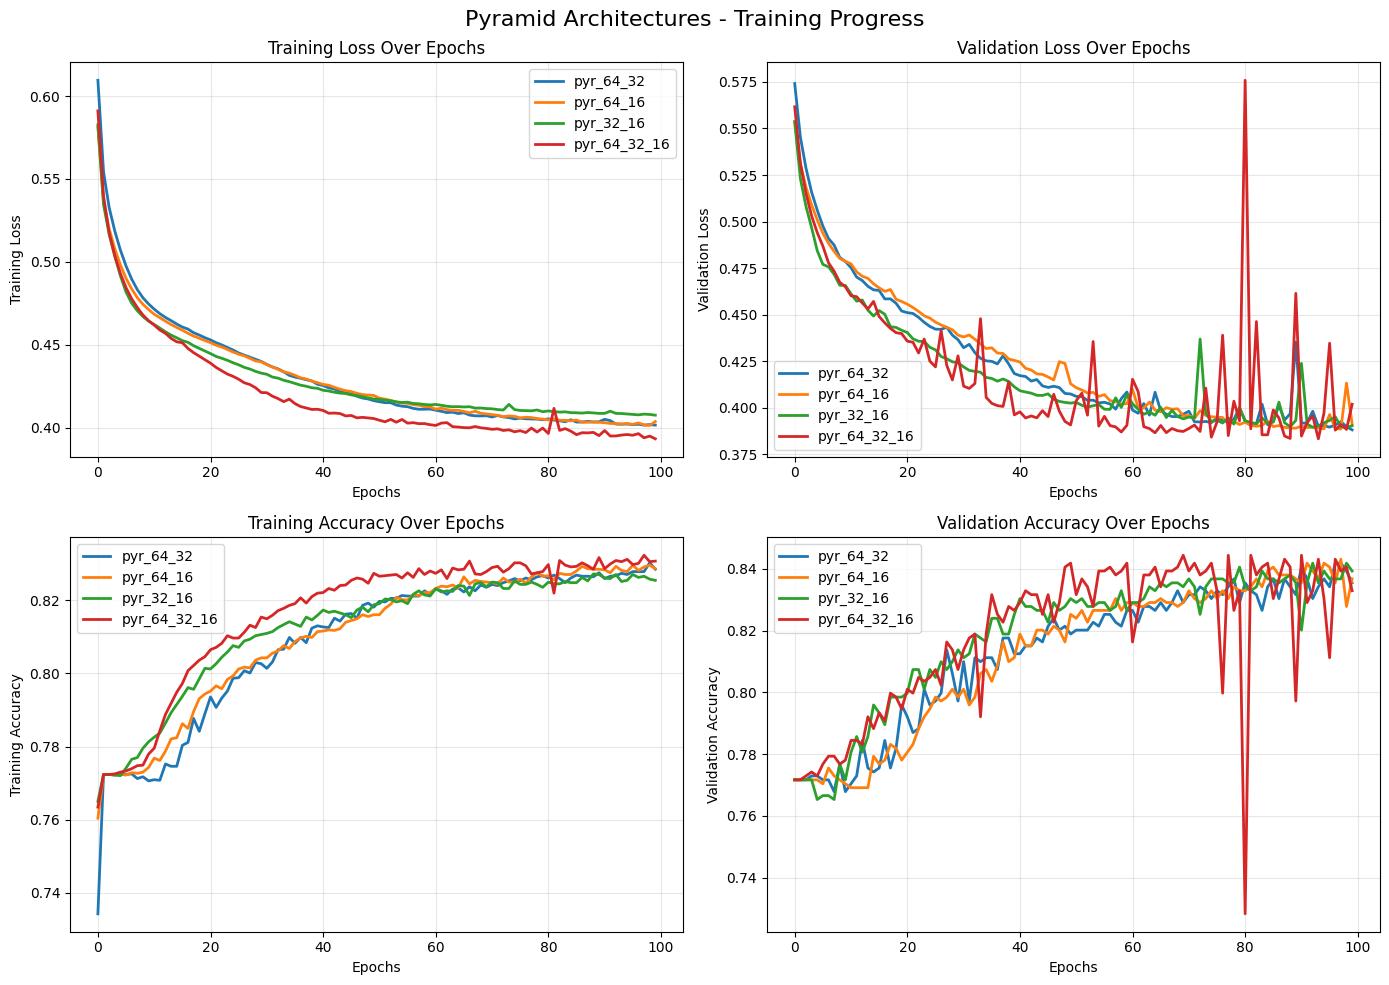

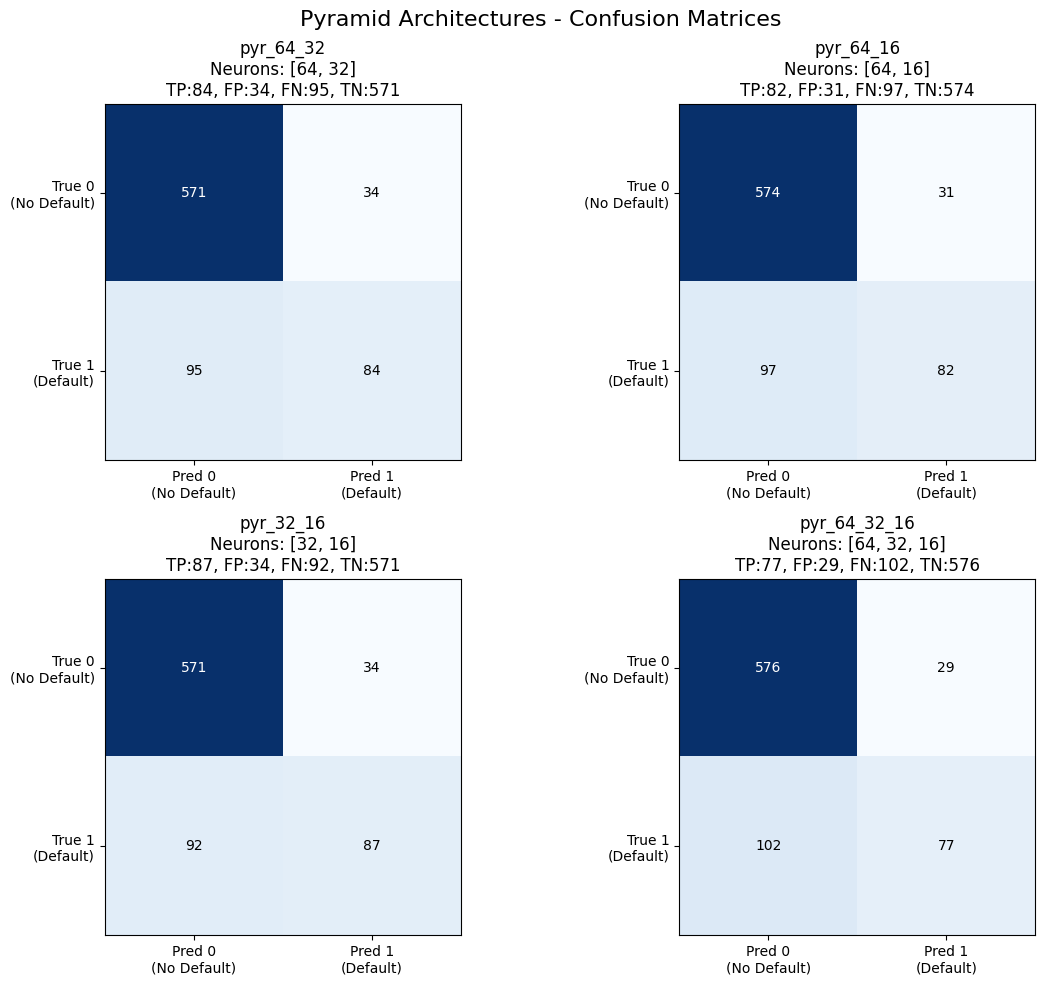


COPY THIS FOR YOUR ACADEMIC TABLE:
Architecture | Neurons | Train Loss | Val Loss | Train Acc | Val Acc | Precision | Recall | F1-Score | TP | FP | FN | TN
pyr_64_32 | [64, 32] | 0.4016 | 0.3882 | 0.8285 | 0.8355 | 0.7119 | 0.4693 | 0.5657 | 84 | 34 | 95 | 571
pyr_64_16 | [64, 16] | 0.4038 | 0.3913 | 0.8286 | 0.8367 | 0.7257 | 0.4581 | 0.5616 | 82 | 31 | 97 | 574
pyr_32_16 | [32, 16] | 0.4076 | 0.3904 | 0.8254 | 0.8393 | 0.7190 | 0.4860 | 0.5800 | 87 | 34 | 92 | 571
pyr_64_32_16 | [64, 32, 16] | 0.3934 | 0.4019 | 0.8307 | 0.8329 | 0.7264 | 0.4302 | 0.5404 | 77 | 29 | 102 | 576


In [ ]:
from sklearn.metrics import precision_score, f1_score, confusion_matrix
import tensorflow as tf
import numpy as np

# Test all pyramid combinations
pyramids = {
    'pyr_64_32': [64, 32],
    'pyr_64_16': [64, 16], 
    'pyr_32_16': [32, 16],
    'pyr_64_32_16': [64, 32, 16]
}

print("PYRAMID ARCHITECTURE PERFORMANCE:")
print("=" * 70)

# Store all results
all_histories = []
all_metrics = []

for name, neurons in pyramids.items():
    print(f"\nTesting {name}: {neurons}")
    
    # Build model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(neurons[0], activation='relu', input_shape=(9,)))
    for units in neurons[1:]:
        model.add(tf.keras.layers.Dense(units, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train model
    history = model.fit(x_train_scaled, y_train, epochs=100, verbose=0, 
                       validation_data=(x_val_scaled, y_val))
    
    # Get final metrics
    val_loss, val_acc = model.evaluate(x_val_scaled, y_val, verbose=0)
    
    # ADDED: Get final training loss from history
    final_train_loss = history.history['loss'][-1]
    final_train_acc = history.history['accuracy'][-1]
    final_val_loss = history.history['val_loss'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    
    # Calculate metrics
    y_pred_prob = model.predict(x_val_scaled, verbose=0)
    y_pred = (y_pred_prob > 0.5).astype(int)
    recall = recall_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, zero_division=0)
    f1 = f1_score(y_val, y_pred, zero_division=0)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Store results
    all_histories.append(history.history)
    all_metrics.append({
        'name': name,
        'neurons': neurons,
        'val_accuracy': val_acc,
        'val_loss': val_loss,
        'final_train_loss': final_train_loss,  # ADDED
        'final_train_acc': final_train_acc,    # ADDED
        'final_val_loss': final_val_loss,      # ADDED
        'final_val_acc': final_val_acc,        # ADDED
        'recall': recall,
        'precision': precision,
        'f1_score': f1,
        'confusion_matrix': cm,
        'tp': tp, 'fp': fp, 'tn': tn, 'fn': fn
    })
    
    # UPDATED PRINT WITH FINAL LOSSES AND CONFUSION MATRIX
    print(f"Final Training Loss: {final_train_loss:.4f} | Final Validation Loss: {final_val_loss:.4f}")
    print(f"Final Training Acc: {final_train_acc:.4f} | Final Validation Acc: {final_val_acc:.4f}")
    print(f"Metrics -> Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f}")
    print(f"Confusion Matrix:")
    print(f"                Predicted 0   Predicted 1")
    print(f"Actual 0        TN: {tn:<6}      FP: {fp:<6}")
    print(f"Actual 1        FN: {fn:<6}      TP: {tp:<6}")
    print("-" * 50)

# Print final comparison WITH ALL LOSS INFORMATION
print("\n" + "=" * 100)
print("FINAL COMPARISON:")
print("=" * 100)
print(f"{'Model':<15} {'Train Loss':<10} {'Val Loss':<10} {'Train Acc':<10} {'Val Acc':<10} {'Precision':<10} {'Recall':<8} {'F1':<8}")
print("-" * 100)
for metrics in all_metrics:
    print(f"{metrics['name']:<15} {metrics['final_train_loss']:.4f}    {metrics['final_val_loss']:.4f}    "
          f"{metrics['final_train_acc']:.4f}     {metrics['final_val_acc']:.4f}     "
          f"{metrics['precision']:.4f}      {metrics['recall']:.4f}   {metrics['f1_score']:.4f}")

# Print detailed confusion matrices summary
print("\n" + "=" * 80)
print("DETAILED CONFUSION MATRICES:")
print("=" * 80)
for metrics in all_metrics:
    print(f"\n{metrics['name']} (Neurons: {metrics['neurons']}):")
    print(f"  True Negatives (TN): {metrics['tn']} - Correctly predicted No Default")
    print(f"  False Positives (FP): {metrics['fp']} - Incorrectly predicted as Default")
    print(f"  False Negatives (FN): {metrics['fn']} - Missed actual Defaults")
    print(f"  True Positives (TP): {metrics['tp']} - Correctly predicted Default")
    print(f"  Total Samples: {metrics['tn'] + metrics['fp'] + metrics['fn'] + metrics['tp']}")
    print(f"  Default Detection Rate: {metrics['recall']:.1%}")

# Plot all architectures together
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Training Loss
for i, (name, history_dict) in enumerate(zip(pyramids.keys(), all_histories)):
    ax1.plot(history_dict['loss'], label=name, linewidth=2)
ax1.set_ylabel('Training Loss')
ax1.set_xlabel('Epochs')
ax1.set_title('Training Loss Over Epochs')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Validation Loss
for i, (name, history_dict) in enumerate(zip(pyramids.keys(), all_histories)):
    ax2.plot(history_dict['val_loss'], label=name, linewidth=2)
ax2.set_ylabel('Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_title('Validation Loss Over Epochs')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Training Accuracy
for i, (name, history_dict) in enumerate(zip(pyramids.keys(), all_histories)):
    ax3.plot(history_dict['accuracy'], label=name, linewidth=2)
ax3.set_ylabel('Training Accuracy')
ax3.set_xlabel('Epochs')
ax3.set_title('Training Accuracy Over Epochs')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Validation Accuracy
for i, (name, history_dict) in enumerate(zip(pyramids.keys(), all_histories)):
    ax4.plot(history_dict['val_accuracy'], label=name, linewidth=2)
ax4.set_ylabel('Validation Accuracy')
ax4.set_xlabel('Epochs')
ax4.set_title('Validation Accuracy Over Epochs')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.suptitle('Pyramid Architectures - Training Progress', fontsize=16)
plt.tight_layout()
plt.show()

# Plot confusion matrices for each architecture
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, metrics in enumerate(all_metrics):
    cm = metrics['confusion_matrix']
    im = axes[i].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    axes[i].set_title(f'{metrics["name"]}\nNeurons: {metrics["neurons"]}\nTP:{metrics["tp"]}, FP:{metrics["fp"]}, FN:{metrics["fn"]}, TN:{metrics["tn"]}')
    axes[i].set_xticks([0, 1])
    axes[i].set_yticks([0, 1])
    axes[i].set_xticklabels(['Pred 0\n(No Default)', 'Pred 1\n(Default)'])
    axes[i].set_yticklabels(['True 0\n(No Default)', 'True 1\n(Default)'])
    
    # Add text annotations
    thresh = cm.max() / 2.
    for i_arr in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            axes[i].text(j, i_arr, format(cm[i_arr, j], 'd'),
                       ha="center", va="center",
                       color="white" if cm[i_arr, j] > thresh else "black")

plt.suptitle('Pyramid Architectures - Confusion Matrices', fontsize=16)
plt.tight_layout()
plt.show()

# Export for academic table
print("\n" + "=" * 90)
print("COPY THIS FOR YOUR ACADEMIC TABLE:")
print("=" * 90)
print("Architecture | Neurons | Train Loss | Val Loss | Train Acc | Val Acc | Precision | Recall | F1-Score | TP | FP | FN | TN")
for metrics in all_metrics:
    print(f"{metrics['name']} | {metrics['neurons']} | {metrics['final_train_loss']:.4f} | {metrics['final_val_loss']:.4f} | "
          f"{metrics['final_train_acc']:.4f} | {metrics['final_val_acc']:.4f} | {metrics['precision']:.4f} | "
          f"{metrics['recall']:.4f} | {metrics['f1_score']:.4f} | {metrics['tp']} | {metrics['fp']} | {metrics['fn']} | {metrics['tn']}")

PYRAMID ARCHITECTURE PERFORMANCE:

Testing pyr_64_32: [64, 32]


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuracy: 0.8355 | Loss: 0.3801 | Recall: 0.4916 | Precision: 0.6984 | F1: 0.5770
Confusion Matrix:
                Predicted 0   Predicted 1
Actual 0        TN: 567         FP: 38    
Actual 1        FN: 91          TP: 88    
----------------------------------------

Testing pyr_64_16: [64, 16]


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuracy: 0.8291 | Loss: 0.3949 | Recall: 0.4358 | Precision: 0.7027 | F1: 0.5379
Confusion Matrix:
                Predicted 0   Predicted 1
Actual 0        TN: 572         FP: 33    
Actual 1        FN: 101         TP: 78    
----------------------------------------

Testing pyr_32_16: [32, 16]


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuracy: 0.8316 | Loss: 0.3892 | Recall: 0.4693 | Precision: 0.6942 | F1: 0.5600
Confusion Matrix:
                Predicted 0   Predicted 1
Actual 0        TN: 568         FP: 37    
Actual 1        FN: 95          TP: 84    
----------------------------------------

Testing pyr_64_32_16: [64, 32, 16]


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuracy: 0.8418 | Loss: 0.3830 | Recall: 0.5587 | Precision: 0.6897 | F1: 0.6173
Confusion Matrix:
                Predicted 0   Predicted 1
Actual 0        TN: 560         FP: 45    
Actual 1        FN: 79          TP: 100   
----------------------------------------

FINAL COMPARISON:
pyr_64_32       | Acc: 0.8355 | Loss: 0.3801 | Recall: 0.4916 | Precision: 0.6984 | F1: 0.5770
pyr_64_16       | Acc: 0.8291 | Loss: 0.3949 | Recall: 0.4358 | Precision: 0.7027 | F1: 0.5379
pyr_32_16       | Acc: 0.8316 | Loss: 0.3892 | Recall: 0.4693 | Precision: 0.6942 | F1: 0.5600
pyr_64_32_16    | Acc: 0.8418 | Loss: 0.3830 | Recall: 0.5587 | Precision: 0.6897 | F1: 0.6173

CONFUSION MATRICES SUMMARY:

pyr_64_32:
  True Negatives: 567 | False Positives: 38
  False Negatives: 91 | True Positives: 88
  Total Samples: 784

pyr_64_16:
  True Negatives: 572 | False Positives: 33
  False Negatives: 101 | True Positives: 78
  Total Samples: 784

pyr_32_16:
  True Negatives: 568 | False Positives: 37
  Fals

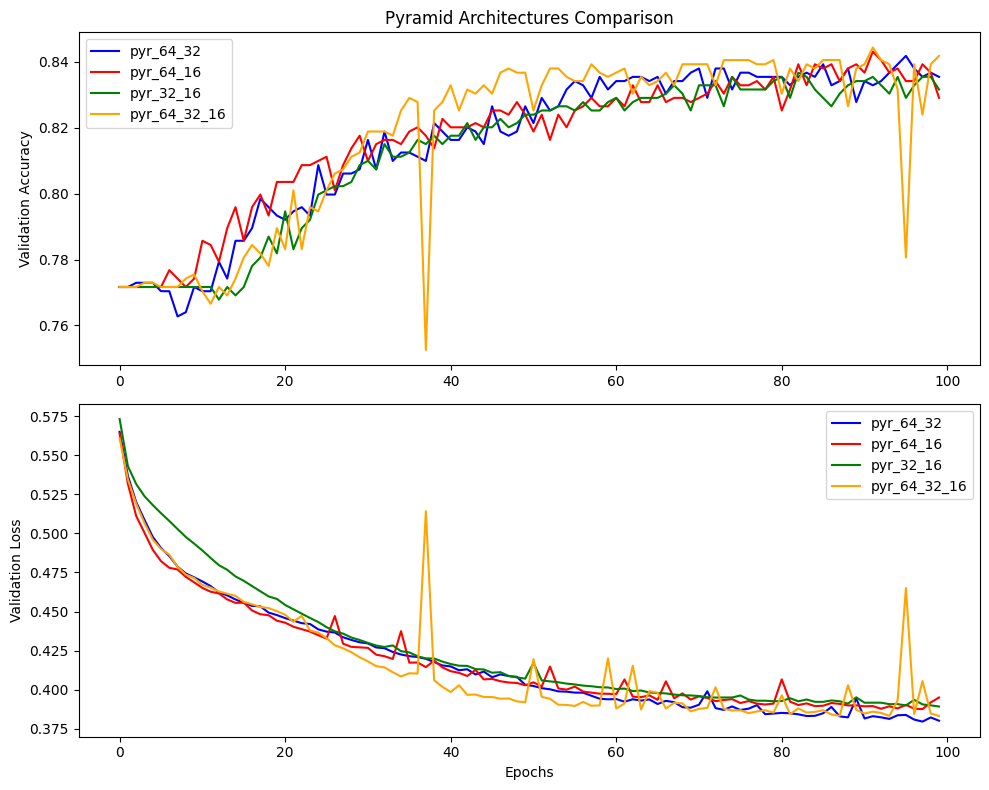

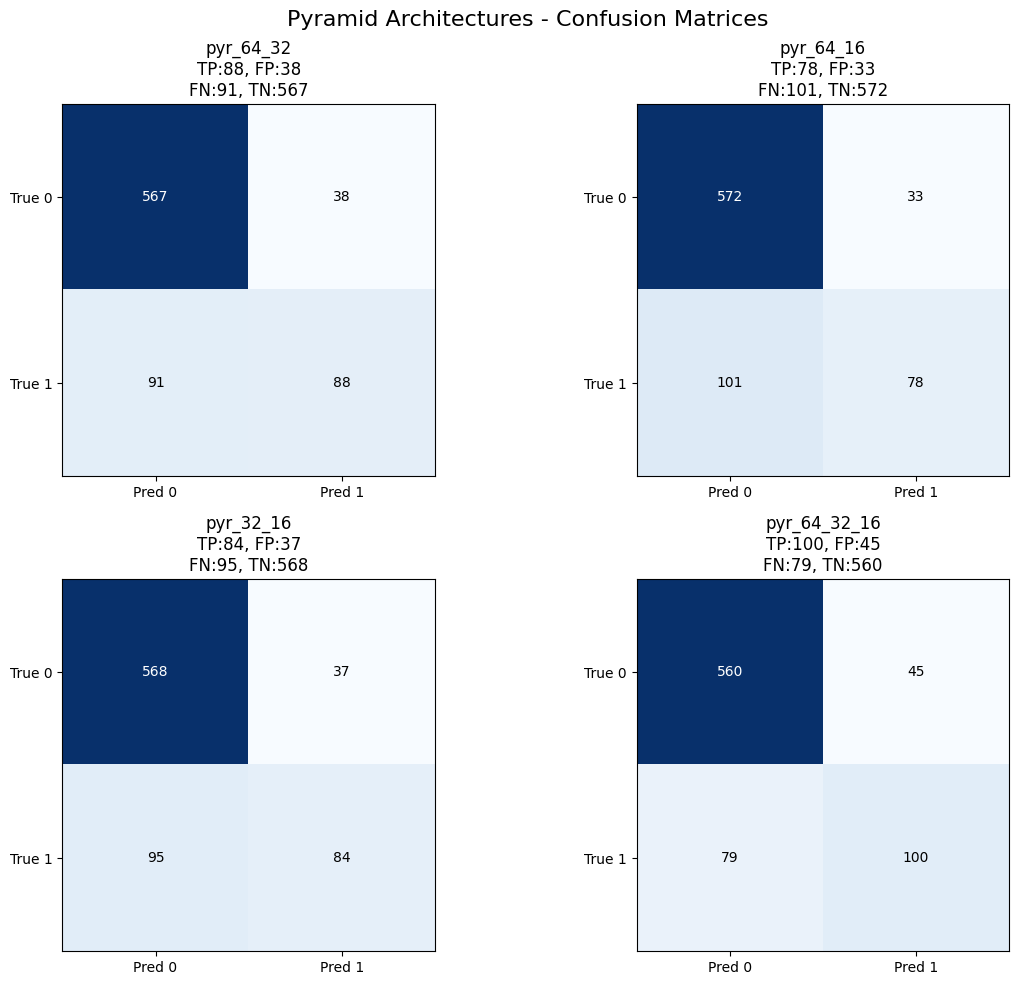

In [ ]:

# Test all pyramid combinations
pyramids = {
    'pyr_64_32': [64, 32],
    'pyr_64_16': [64, 16], 
    'pyr_32_16': [32, 16],
    'pyr_64_32_16': [64, 32, 16]
}

print("PYRAMID ARCHITECTURE PERFORMANCE:")
print("=" * 50)

# Store all results
all_histories = []
all_metrics = []

for name, neurons in pyramids.items():
    print(f"\nTesting {name}: {neurons}")
    
    # Build model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(neurons[0], activation='relu', input_shape=(9,)))
    for units in neurons[1:]:
        model.add(tf.keras.layers.Dense(units, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train model
    history = model.fit(x_train_scaled, y_train, epochs=100, verbose=0, 
                       validation_data=(x_val_scaled, y_val))
    
    # Get final metrics
    val_loss, val_acc = model.evaluate(x_val_scaled, y_val, verbose=0)
    
    # Calculate metrics
    y_pred_prob = model.predict(x_val_scaled, verbose=0)
    y_pred = (y_pred_prob > 0.5).astype(int)
    recall = recall_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, zero_division=0)
    f1 = f1_score(y_val, y_pred, zero_division=0)
    
    # ADDED: Calculate confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Store results
    all_histories.append(history.history)
    all_metrics.append({
        'name': name,
        'neurons': neurons,
        'val_accuracy': val_acc,
        'val_loss': val_loss,
        'recall': recall,
        'precision': precision,
        'f1_score': f1,
        'confusion_matrix': cm,  # ADDED
        'tp': tp, 'fp': fp, 'tn': tn, 'fn': fn  # ADDED
    })
    
    # UPDATED PRINT WITH CONFUSION MATRIX
    print(f"Accuracy: {val_acc:.4f} | Loss: {val_loss:.4f} | Recall: {recall:.4f} | Precision: {precision:.4f} | F1: {f1:.4f}")
    print(f"Confusion Matrix:")
    print(f"                Predicted 0   Predicted 1")
    print(f"Actual 0        TN: {tn:<6}      FP: {fp:<6}")
    print(f"Actual 1        FN: {fn:<6}      TP: {tp:<6}")
    print("-" * 40)

# Print final comparison
print("\n" + "=" * 80)
print("FINAL COMPARISON:")
print("=" * 80)
for metrics in all_metrics:
    print(f"{metrics['name']:15} | Acc: {metrics['val_accuracy']:.4f} | "
          f"Loss: {metrics['val_loss']:.4f} | Recall: {metrics['recall']:.4f} | "
          f"Precision: {metrics['precision']:.4f} | F1: {metrics['f1_score']:.4f}")

# Print confusion matrices summary
print("\n" + "=" * 60)
print("CONFUSION MATRICES SUMMARY:")
print("=" * 60)
for metrics in all_metrics:
    print(f"\n{metrics['name']}:")
    print(f"  True Negatives: {metrics['tn']} | False Positives: {metrics['fp']}")
    print(f"  False Negatives: {metrics['fn']} | True Positives: {metrics['tp']}")
    print(f"  Total Samples: {metrics['tn'] + metrics['fp'] + metrics['fn'] + metrics['tp']}")

# Plot all architectures together
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange']

for i, (name, history_dict) in enumerate(zip(pyramids.keys(), all_histories)):
    ax1.plot(history_dict['val_accuracy'], label=name, color=colors[i])
    ax2.plot(history_dict['val_loss'], label=name, color=colors[i])

ax1.set_ylabel('Validation Accuracy')
ax2.set_ylabel('Validation Loss')
ax2.set_xlabel('Epochs')
ax1.legend()
ax2.legend()
ax1.set_title('Pyramid Architectures Comparison')
plt.tight_layout()
plt.show()

# ADDED: Plot confusion matrices for each architecture
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, metrics in enumerate(all_metrics):
    cm = metrics['confusion_matrix']
    im = axes[i].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    axes[i].set_title(f'{metrics["name"]}\nTP:{metrics["tp"]}, FP:{metrics["fp"]}\nFN:{metrics["fn"]}, TN:{metrics["tn"]}')
    axes[i].set_xticks([0, 1])
    axes[i].set_yticks([0, 1])
    axes[i].set_xticklabels(['Pred 0', 'Pred 1'])
    axes[i].set_yticklabels(['True 0', 'True 1'])
    
    # Add text annotations
    thresh = cm.max() / 2.
    for i_arr in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            axes[i].text(j, i_arr, format(cm[i_arr, j], 'd'),
                       ha="center", va="center",
                       color="white" if cm[i_arr, j] > thresh else "black")

plt.suptitle('Pyramid Architectures - Confusion Matrices', fontsize=16)
plt.tight_layout()
plt.show()

PYRAMID ARCHITECTURE PERFORMANCE:

Testing pyr_64_32: [64, 32]
Accuracy: 0.8291 | Balanced Acc: 0.7142
Precision: 0.6667 | Recall: 0.5028 | F1: 0.5732

Testing pyr_64_16: [64, 16]


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuracy: 0.8444 | Balanced Acc: 0.7477
Precision: 0.6939 | Recall: 0.5698 | F1: 0.6258

Testing pyr_32_16: [32, 16]


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuracy: 0.8316 | Balanced Acc: 0.7178
Precision: 0.6741 | Recall: 0.5084 | F1: 0.5796

Testing pyr_64_32_16: [64, 32, 16]


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuracy: 0.8163 | Balanced Acc: 0.7256
Precision: 0.6061 | Recall: 0.5587 | F1: 0.5814

FINAL COMPARISON WITH COMPLETE METRICS:
Model           Balanced Acc Precision  Recall   F1-Score
--------------------------------------------------------------------------------
pyr_64_32       0.7142      0.6667     0.5028   0.5732
pyr_64_16       0.7477      0.6939     0.5698   0.6258
pyr_32_16       0.7178      0.6741     0.5084   0.5796
pyr_64_32_16    0.7256      0.6061     0.5587   0.5814

🏆 BEST MODEL: pyr_64_16
   F1-Score: 0.6258, Balanced Accuracy: 0.7477


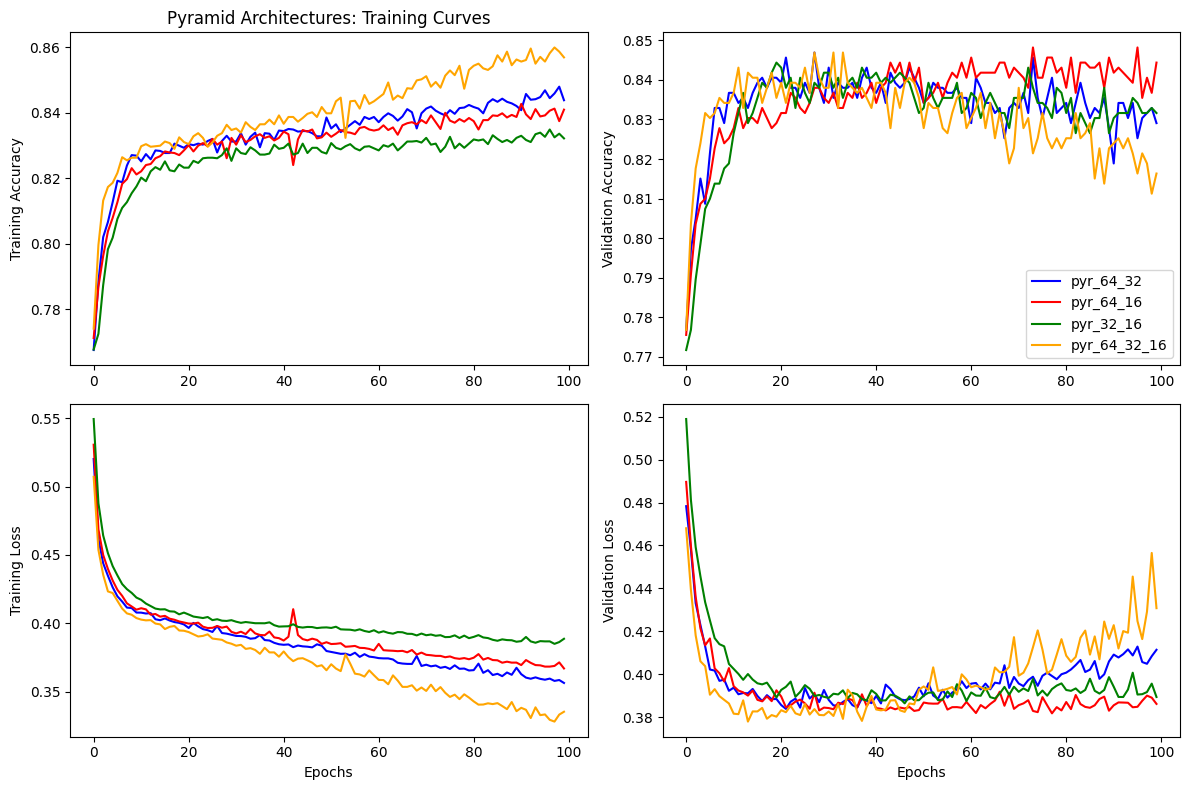

In [ ]:
# Test all pyramid combinations
pyramids = {
    'pyr_64_32': [64, 32],
    'pyr_64_16': [64, 16], 
    'pyr_32_16': [32, 16],
    'pyr_64_32_16': [64, 32, 16]
}

print("PYRAMID ARCHITECTURE PERFORMANCE:")
print("=" * 70)

# Store all results
all_histories = []
all_metrics = []

for name, neurons in pyramids.items():
    print(f"\nTesting {name}: {neurons}")
    
    # Build and train model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(neurons[0], activation='relu', input_shape=(9,)))
    for units in neurons[1:]:
        model.add(tf.keras.layers.Dense(units, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    history = model.fit(x_train_scaled, y_train, epochs=100, verbose=0, 
                       validation_data=(x_val_scaled, y_val))
    
    # Get predictions
    y_pred_prob = model.predict(x_val_scaled, verbose=0)
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    # Calculate COMPLETE metrics including balanced accuracy
    val_loss, val_acc = model.evaluate(x_val_scaled, y_val, verbose=0)
    balanced_acc = balanced_accuracy_score(y_val, y_pred)  # NEW
    precision = precision_score(y_val, y_pred, zero_division=0)  # NEW
    recall = recall_score(y_val, y_pred, zero_division=0)
    f1 = f1_score(y_val, y_pred, zero_division=0)  # NEW
    
    # Store results
    all_histories.append(history.history)
    all_metrics.append({
        'name': name, 'neurons': neurons,
        'val_accuracy': val_acc, 'val_loss': val_loss, 
        'balanced_accuracy': balanced_acc,  # NEW
        'precision': precision,  # NEW
        'recall': recall, 
        'f1_score': f1  # NEW
    })
    
    print(f"Accuracy: {val_acc:.4f} | Balanced Acc: {balanced_acc:.4f}")  # UPDATED
    print(f"Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f}")  # UPDATED

# Print final comparison with ALL metrics
print("\n" + "=" * 80)
print("FINAL COMPARISON WITH COMPLETE METRICS:")
print("=" * 80)
print(f"{'Model':<15} {'Balanced Acc':<12} {'Precision':<10} {'Recall':<8} {'F1-Score':<8}")
print("-" * 80)
for metrics in all_metrics:
    print(f"{metrics['name']:<15} {metrics['balanced_accuracy']:.4f}      "
          f"{metrics['precision']:.4f}     "
          f"{metrics['recall']:.4f}   "
          f"{metrics['f1_score']:.4f}")

# Find best model by F1-score (most balanced metric)
best_model = max(all_metrics, key=lambda x: x['f1_score'])
print(f"\n🏆 BEST MODEL: {best_model['name']}")
print(f"   F1-Score: {best_model['f1_score']:.4f}, Balanced Accuracy: {best_model['balanced_accuracy']:.4f}")

# Create 2x2 subplot with training AND validation
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))
colors = ['blue', 'red', 'green', 'orange']

for i, (name, history_dict) in enumerate(zip(pyramids.keys(), all_histories)):
    # Top left: Training Accuracy
    ax1.plot(history_dict['accuracy'], label=name, color=colors[i])
    # Top right: Validation Accuracy  
    ax2.plot(history_dict['val_accuracy'], label=name, color=colors[i])
    # Bottom left: Training Loss
    ax3.plot(history_dict['loss'], label=name, color=colors[i])
    # Bottom right: Validation Loss
    ax4.plot(history_dict['val_loss'], label=name, color=colors[i])

# Labels and legends
ax1.set_ylabel('Training Accuracy')
ax2.set_ylabel('Validation Accuracy')
ax3.set_ylabel('Training Loss')
ax4.set_ylabel('Validation Loss')
ax1.set_title('Pyramid Architectures: Training Curves')

for ax in [ax3, ax4]:
    ax.set_xlabel('Epochs')

ax2.legend()
plt.tight_layout()
plt.show()

PYRAMID ARCHITECTURE PERFORMANCE:

Testing pyr_64_32: [64, 32]


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Balanced Acc: 0.7116 | Precision: 0.6960
Recall: 0.4860 | F1-Score: 0.5724
Confusion: TP=87, FP=38, TN=567, FN=92

Testing pyr_64_16: [64, 16]


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Balanced Acc: 0.7315 | Precision: 0.6985
Recall: 0.5307 | F1-Score: 0.6032
Confusion: TP=95, FP=41, TN=564, FN=84

Testing pyr_32_16: [32, 16]


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Balanced Acc: 0.7212 | Precision: 0.6528
Recall: 0.5251 | F1-Score: 0.5820
Confusion: TP=94, FP=50, TN=555, FN=85

Testing pyr_64_32_16: [64, 32, 16]


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Balanced Acc: 0.7163 | Precision: 0.6267
Recall: 0.5251 | F1-Score: 0.5714
Confusion: TP=94, FP=56, TN=549, FN=85

FINAL RESULTS TABLE FOR ACADEMIC REPORT:
Architecture    Neurons      Balanced Acc Precision  Recall   F1-Score
--------------------------------------------------------------------------------
pyr_64_32       [64, 32]     0.7116      0.6960     0.4860   0.5724
pyr_64_16       [64, 16]     0.7315      0.6985     0.5307   0.6032
pyr_32_16       [32, 16]     0.7212      0.6528     0.5251   0.5820
pyr_64_32_16    [64, 32, 16] 0.7163      0.6267     0.5251   0.5714

BEST PERFORMING ARCHITECTURE: pyr_64_16
Neurons: [64, 16]
Balanced Accuracy: 0.7315
F1-Score: 0.6032


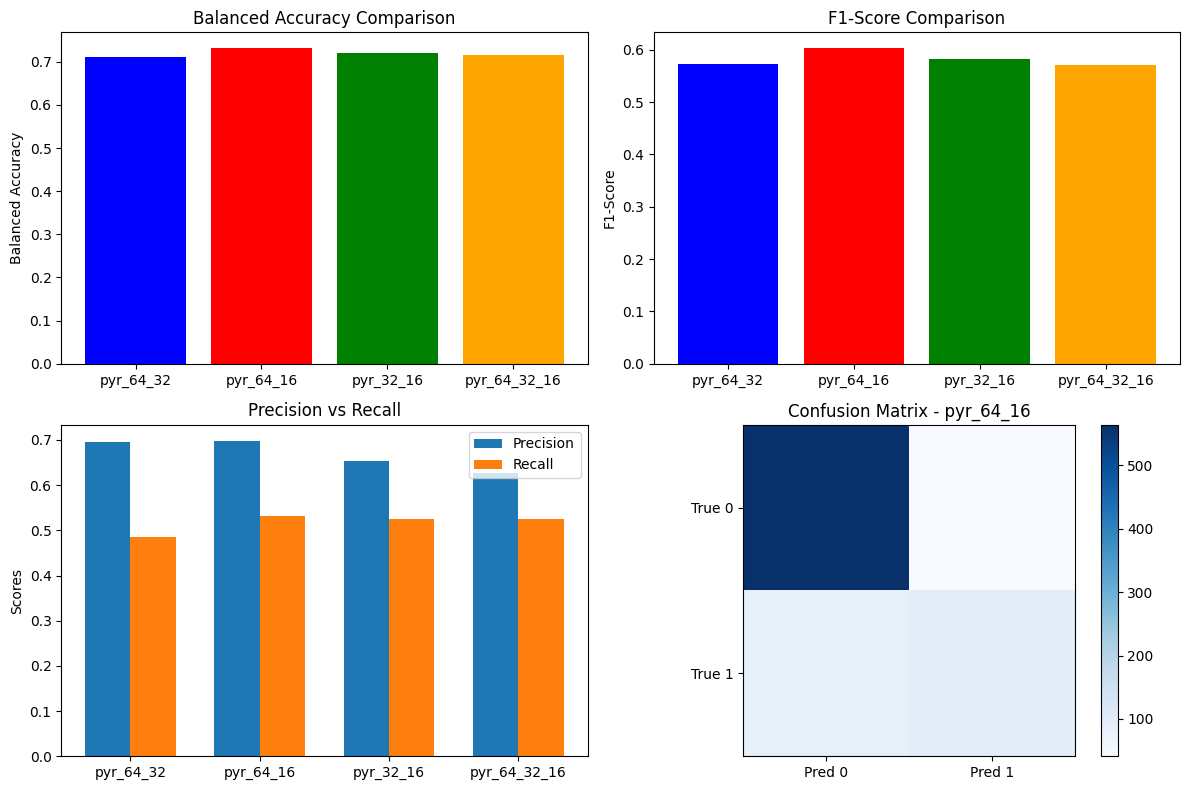


COPY THIS FOR YOUR ACADEMIC TABLE:
Architecture | Neurons | Balanced Accuracy | Precision | Recall | F1-Score
pyr_64_32 | [64, 32] | 0.7116 | 0.6960 | 0.4860 | 0.5724
pyr_64_16 | [64, 16] | 0.7315 | 0.6985 | 0.5307 | 0.6032
pyr_32_16 | [32, 16] | 0.7212 | 0.6528 | 0.5251 | 0.5820
pyr_64_32_16 | [64, 32, 16] | 0.7163 | 0.6267 | 0.5251 | 0.5714


In [ ]:
import tensorflow as tf
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Test all pyramid combinations with COMPLETE metrics
pyramids = {
    'pyr_64_32': [64, 32],
    'pyr_64_16': [64, 16], 
    'pyr_32_16': [32, 16],
    'pyr_64_32_16': [64, 32, 16]
}

print("PYRAMID ARCHITECTURE PERFORMANCE:")
print("=" * 60)

# Store all results for final comparison table
all_metrics = []

for name, neurons in pyramids.items():
    print(f"\nTesting {name}: {neurons}")
    
    # Build model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(neurons[0], activation='relu', input_shape=(9,)))
    for units in neurons[1:]:
        model.add(tf.keras.layers.Dense(units, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', 
                  metrics=['accuracy', 'Precision', 'Recall'])
    
    # Train model
    history = model.fit(x_train_scaled, y_train, epochs=100, verbose=0, 
                       validation_data=(x_val_scaled, y_val),
                       batch_size=32)
    
    # Get predictions for comprehensive metrics
    y_pred_prob = model.predict(x_val_scaled, verbose=0)
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    # Calculate ALL required metrics
    balanced_acc = balanced_accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, zero_division=0)
    recall = recall_score(y_val, y_pred, zero_division=0)
    f1 = f1_score(y_val, y_pred, zero_division=0)
    
    # Get confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
    
    # Store results for final table
    all_metrics.append({
        'name': name,
        'neurons': neurons,
        'balanced_accuracy': balanced_acc,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'true_positives': tp,
        'false_positives': fp,
        'true_negatives': tn,
        'false_negatives': fn,
        'model': model  # Store model for later use if needed
    })
    
    print(f"Balanced Acc: {balanced_acc:.4f} | Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f} | F1-Score: {f1:.4f}")
    print(f"Confusion: TP={tp}, FP={fp}, TN={tn}, FN={fn}")

# PRINT FINAL ACADEMIC TABLE
print("\n" + "=" * 80)
print("FINAL RESULTS TABLE FOR ACADEMIC REPORT:")
print("=" * 80)
print(f"{'Architecture':<15} {'Neurons':<12} {'Balanced Acc':<12} {'Precision':<10} {'Recall':<8} {'F1-Score':<8}")
print("-" * 80)

for metrics in all_metrics:
    print(f"{metrics['name']:<15} {str(metrics['neurons']):<12} "
          f"{metrics['balanced_accuracy']:.4f}      "
          f"{metrics['precision']:.4f}     "
          f"{metrics['recall']:.4f}   "
          f"{metrics['f1_score']:.4f}")

# Find best performing model
best_model = max(all_metrics, key=lambda x: x['f1_score'])
print("\n" + "=" * 50)
print(f"BEST PERFORMING ARCHITECTURE: {best_model['name']}")
print(f"Neurons: {best_model['neurons']}")
print(f"Balanced Accuracy: {best_model['balanced_accuracy']:.4f}")
print(f"F1-Score: {best_model['f1_score']:.4f}")
print("=" * 50)

# Plot comparison
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Balanced Accuracy
arch_names = [m['name'] for m in all_metrics]
balanced_accs = [m['balanced_accuracy'] for m in all_metrics]
ax1.bar(arch_names, balanced_accs, color=['blue', 'red', 'green', 'orange'])
ax1.set_ylabel('Balanced Accuracy')
ax1.set_title('Balanced Accuracy Comparison')

# Plot 2: F1-Score
f1_scores = [m['f1_score'] for m in all_metrics]
ax2.bar(arch_names, f1_scores, color=['blue', 'red', 'green', 'orange'])
ax2.set_ylabel('F1-Score')
ax2.set_title('F1-Score Comparison')

# Plot 3: Precision-Recall Comparison
precision_vals = [m['precision'] for m in all_metrics]
recall_vals = [m['recall'] for m in all_metrics]
x = np.arange(len(arch_names))
width = 0.35
ax3.bar(x - width/2, precision_vals, width, label='Precision')
ax3.bar(x + width/2, recall_vals, width, label='Recall')
ax3.set_ylabel('Scores')
ax3.set_title('Precision vs Recall')
ax3.set_xticks(x)
ax3.set_xticklabels(arch_names)
ax3.legend()

# Plot 4: Confusion Matrix for Best Model
cm = np.array([[best_model['true_negatives'], best_model['false_positives']],
               [best_model['false_negatives'], best_model['true_positives']]])
im = ax4.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax4.set_title(f'Confusion Matrix - {best_model["name"]}')
ax4.set_xticks([0, 1])
ax4.set_yticks([0, 1])
ax4.set_xticklabels(['Pred 0', 'Pred 1'])
ax4.set_yticklabels(['True 0', 'True 1'])
plt.colorbar(im, ax=ax4)

plt.tight_layout()
plt.show()

# Export results for your report
print("\nCOPY THIS FOR YOUR ACADEMIC TABLE:")
print("Architecture | Neurons | Balanced Accuracy | Precision | Recall | F1-Score")
for metrics in all_metrics:
    print(f"{metrics['name']} | {metrics['neurons']} | {metrics['balanced_accuracy']:.4f} | "
          f"{metrics['precision']:.4f} | {metrics['recall']:.4f} | {metrics['f1_score']:.4f}")

---

### __<span style= "color: #92bbcaff;"> CONSTANT WIDTH ARCHITECTURE </span>__ 

CONSTANT WIDTH ARCHITECTURE PERFORMANCE:

Testing cw_64_3: [64, 64, 64]


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Final Training Loss: 0.3943 | Final Validation Loss: 0.3798
Final Training Acc: 0.8318 | Final Validation Acc: 0.8406
Precision: 0.7015 | Recall: 0.5251 | F1: 0.6006
Confusion Matrix: TP=94, FP=40, TN=565, FN=85

Testing cw_64_2: [64, 64]


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Final Training Loss: 0.4037 | Final Validation Loss: 0.3858
Final Training Acc: 0.8283 | Final Validation Acc: 0.8380
Precision: 0.7063 | Recall: 0.4972 | F1: 0.5836
Confusion Matrix: TP=89, FP=37, TN=568, FN=90

Testing cw_32_3: [32, 32, 32]


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Final Training Loss: 0.3968 | Final Validation Loss: 0.3856
Final Training Acc: 0.8315 | Final Validation Acc: 0.8355
Precision: 0.6812 | Recall: 0.5251 | F1: 0.5931
Confusion Matrix: TP=94, FP=44, TN=561, FN=85

Testing cw_32_2: [32, 32]


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Final Training Loss: 0.4053 | Final Validation Loss: 0.3869
Final Training Acc: 0.8283 | Final Validation Acc: 0.8342
Precision: 0.6992 | Recall: 0.4804 | F1: 0.5695
Confusion Matrix: TP=86, FP=37, TN=568, FN=93

Testing cw_16_3: [16, 16, 16]


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Final Training Loss: 0.4041 | Final Validation Loss: 0.3957
Final Training Acc: 0.8278 | Final Validation Acc: 0.8367
Precision: 0.6711 | Recall: 0.5587 | F1: 0.6098
Confusion Matrix: TP=100, FP=49, TN=556, FN=79

Testing cw_16_2: [16, 16]


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Final Training Loss: 0.4085 | Final Validation Loss: 0.3903
Final Training Acc: 0.8275 | Final Validation Acc: 0.8367
Precision: 0.7297 | Recall: 0.4525 | F1: 0.5586
Confusion Matrix: TP=81, FP=30, TN=575, FN=98

RANKED BY ACCURACY:
1. cw_64_3         | Acc: 0.8406 | Loss: 0.3798 | Recall: 0.5251 | F1: 0.6006
2. cw_64_2         | Acc: 0.8380 | Loss: 0.3858 | Recall: 0.4972 | F1: 0.5836
3. cw_16_3         | Acc: 0.8367 | Loss: 0.3957 | Recall: 0.5587 | F1: 0.6098
4. cw_16_2         | Acc: 0.8367 | Loss: 0.3903 | Recall: 0.4525 | F1: 0.5586
5. cw_32_3         | Acc: 0.8355 | Loss: 0.3856 | Recall: 0.5251 | F1: 0.5931
6. cw_32_2         | Acc: 0.8342 | Loss: 0.3869 | Recall: 0.4804 | F1: 0.5695

RANKED BY F1-SCORE:
1. cw_16_3         | F1: 0.6098 | Recall: 0.5587 | Precision: 0.6711 | Acc: 0.8367
2. cw_64_3         | F1: 0.6006 | Recall: 0.5251 | Precision: 0.7015 | Acc: 0.8406
3. cw_32_3         | F1: 0.5931 | Recall: 0.5251 | Precision: 0.6812 | Acc: 0.8355
4. cw_64_2         | F1: 0.58

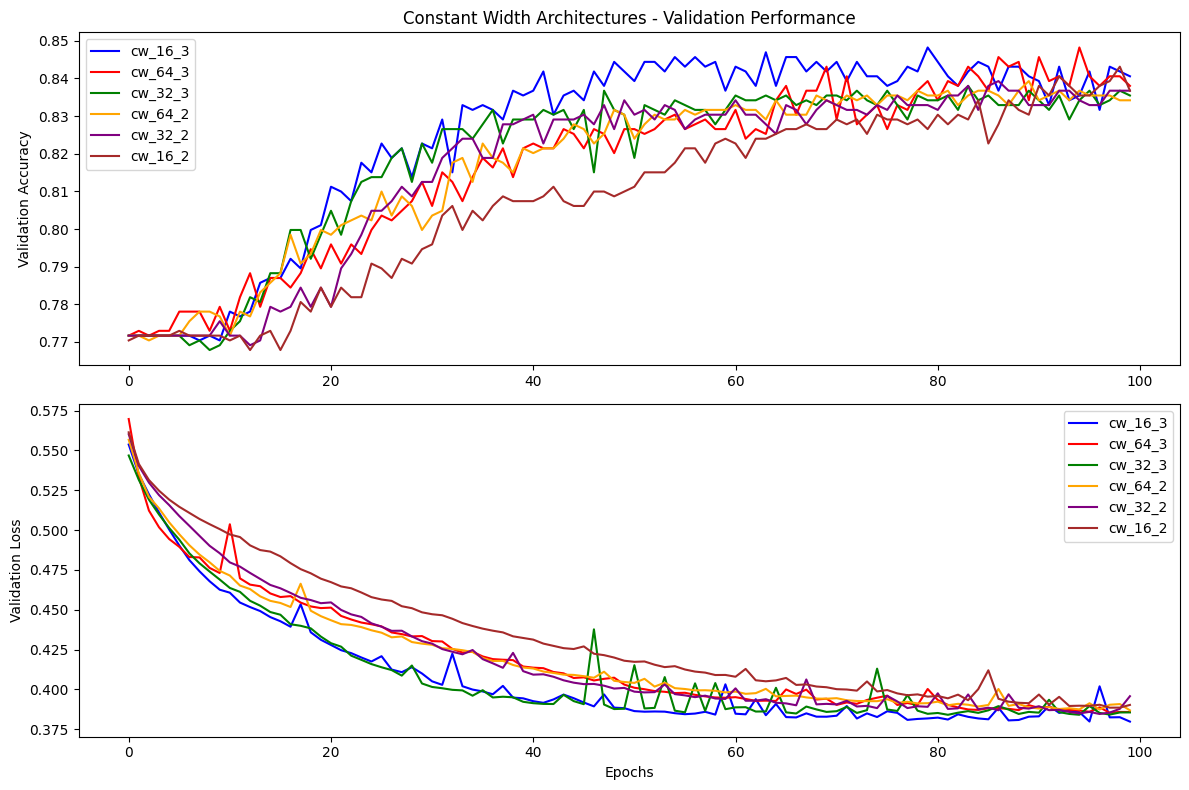

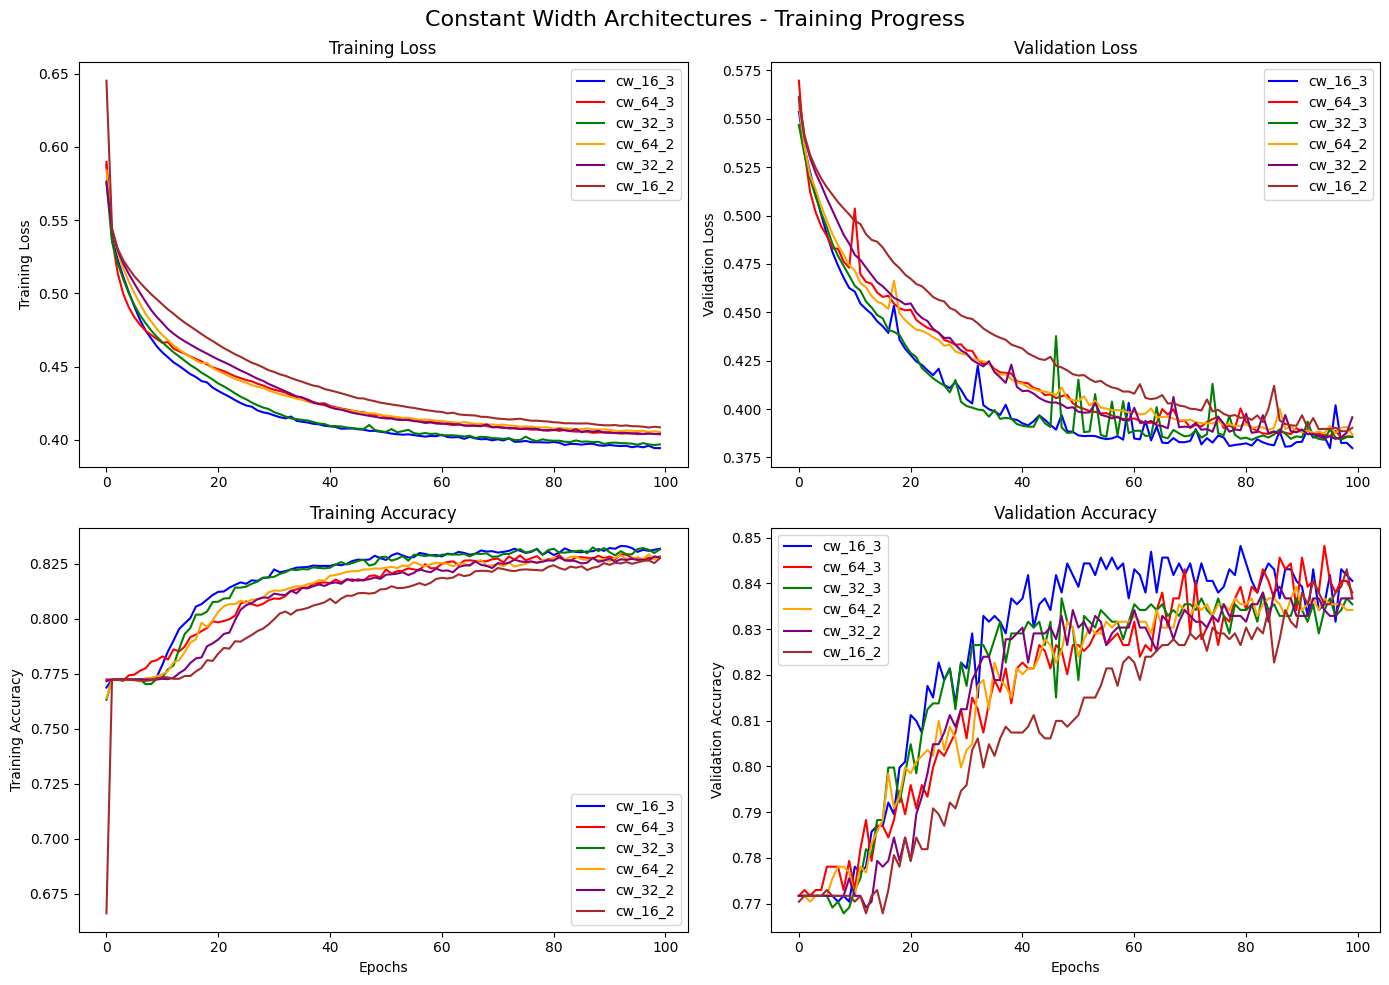

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import tensorflow as tf
import numpy as np

# Test all constant width combinations
constant_width = {
    'cw_64_3': [64, 64, 64],
    'cw_64_2': [64, 64],
    'cw_32_3': [32, 32, 32], 
    'cw_32_2': [32, 32], 
    'cw_16_3': [16, 16, 16],
    'cw_16_2': [16, 16]
}

print("CONSTANT WIDTH ARCHITECTURE PERFORMANCE:")
print("=" * 70)

all_results = []
all_histories = []

for name, neurons in constant_width.items():
    print(f"\nTesting {name}: {neurons}")
    
    # Build model - FIXED: Use InputLayer
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(9,)))  # FIXED
    model.add(tf.keras.layers.Dense(neurons[0], activation='relu'))
    for units in neurons[1:]:
        model.add(tf.keras.layers.Dense(units, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    # FIXED: Corrected typo in 'binary_crossentropy'
    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train and get history for plotting
    history = model.fit(x_train_scaled, y_train, epochs=100, verbose=0, 
                       validation_data=(x_val_scaled, y_val))
    
    # Get final metrics from history
    final_train_loss = history.history['loss'][-1]
    final_train_acc = history.history['accuracy'][-1]
    final_val_loss = history.history['val_loss'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    
    # Also get from evaluate
    val_loss, val_acc = model.evaluate(x_val_scaled, y_val, verbose=0)
    
    # Calculate ALL metrics
    y_pred_prob = model.predict(x_val_scaled, verbose=0)
    y_pred = (y_pred_prob > 0.5).astype(int)
    recall = recall_score(y_val, y_pred, zero_division=0)
    precision = precision_score(y_val, y_pred, zero_division=0)
    f1 = f1_score(y_val, y_pred, zero_division=0)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    # Store results
    all_results.append({
        'name': name,
        'neurons': neurons,
        'val_accuracy': val_acc,
        'val_loss': val_loss,
        'final_train_loss': final_train_loss,
        'final_train_acc': final_train_acc,
        'final_val_loss': final_val_loss,
        'final_val_acc': final_val_acc,
        'recall': recall,
        'precision': precision,
        'f1_score': f1,
        'tp': tp, 'fp': fp, 'tn': tn, 'fn': fn,
        'history': history.history
    })
    all_histories.append(history.history)
    
    print(f"Final Training Loss: {final_train_loss:.4f} | Final Validation Loss: {final_val_loss:.4f}")
    print(f"Final Training Acc: {final_train_acc:.4f} | Final Validation Acc: {final_val_acc:.4f}")
    print(f"Precision: {precision:.4f} | Recall: {recall:.4f} | F1: {f1:.4f}")
    print(f"Confusion Matrix: TP={tp}, FP={fp}, TN={tn}, FN={fn}")

# Rank by accuracy
print("\n" + "=" * 80)
print("RANKED BY ACCURACY:")
print("=" * 80)
all_results.sort(key=lambda x: x['val_accuracy'], reverse=True)
for i, result in enumerate(all_results):
    print(f"{i+1}. {result['name']:15} | Acc: {result['val_accuracy']:.4f} | Loss: {result['val_loss']:.4f} | "
          f"Recall: {result['recall']:.4f} | F1: {result['f1_score']:.4f}")

# Rank by F1-score (better metric for imbalanced data)
print("\n" + "=" * 80)
print("RANKED BY F1-SCORE:")
print("=" * 80)
all_results.sort(key=lambda x: x['f1_score'], reverse=True)
for i, result in enumerate(all_results):
    print(f"{i+1}. {result['name']:15} | F1: {result['f1_score']:.4f} | Recall: {result['recall']:.4f} | "
          f"Precision: {result['precision']:.4f} | Acc: {result['val_accuracy']:.4f}")

# Final comprehensive comparison
print("\n" + "=" * 100)
print("FINAL COMPARISON:")
print("=" * 100)
print(f"{'Model':<10} {'Neurons':<15} {'Train Loss':<10} {'Val Loss':<10} {'Val Acc':<8} {'Precision':<9} {'Recall':<8} {'F1':<8}")
print("-" * 100)
for result in all_results:
    print(f"{result['name']:<10} {str(result['neurons']):<15} {result['final_train_loss']:.4f}    "
          f"{result['final_val_loss']:.4f}    {result['val_accuracy']:.4f}   "
          f"{result['precision']:.4f}     {result['recall']:.4f}   {result['f1_score']:.4f}")

# Plot all architectures together - FIXED: Use constant_width data
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown']

for i, (result, history_dict) in enumerate(zip(all_results, all_histories)):
    ax1.plot(history_dict['val_accuracy'], label=result['name'], color=colors[i])
    ax2.plot(history_dict['val_loss'], label=result['name'], color=colors[i])

ax1.set_ylabel('Validation Accuracy')
ax2.set_ylabel('Validation Loss')
ax2.set_xlabel('Epochs')
ax1.legend()
ax2.legend()
ax1.set_title('Constant Width Architectures - Validation Performance')
plt.tight_layout()
plt.show()

# Plot training vs validation comparison
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# Training Loss
for i, (result, history_dict) in enumerate(zip(all_results, all_histories)):
    ax1.plot(history_dict['loss'], label=result['name'], color=colors[i])
ax1.set_ylabel('Training Loss')
ax1.set_title('Training Loss')
ax1.legend()

# Validation Loss
for i, (result, history_dict) in enumerate(zip(all_results, all_histories)):
    ax2.plot(history_dict['val_loss'], label=result['name'], color=colors[i])
ax2.set_ylabel('Validation Loss')
ax2.set_title('Validation Loss')
ax2.legend()

# Training Accuracy
for i, (result, history_dict) in enumerate(zip(all_results, all_histories)):
    ax3.plot(history_dict['accuracy'], label=result['name'], color=colors[i])
ax3.set_ylabel('Training Accuracy')
ax3.set_xlabel('Epochs')
ax3.set_title('Training Accuracy')
ax3.legend()

# Validation Accuracy
for i, (result, history_dict) in enumerate(zip(all_results, all_histories)):
    ax4.plot(history_dict['val_accuracy'], label=result['name'], color=colors[i])
ax4.set_ylabel('Validation Accuracy')
ax4.set_xlabel('Epochs')
ax4.set_title('Validation Accuracy')
ax4.legend()

plt.suptitle('Constant Width Architectures - Training Progress', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:


# Test all constant width combinations with COMPLETE metrics
constant_width = {
    'cw_64_3': [64, 64, 64],
    'cw_64_2': [64, 64],
    'cw_32_3': [32, 32, 32], 
    'cw_32_2': [32, 32], 
    'cw_16_3': [16, 16, 16],
    'cw_16_2': [16, 16]
}

print("CONSTANT WIDTH ARCHITECTURE PERFORMANCE:")
print("=" * 70)

# Store all results for final comparison table
all_metrics = []
all_histories = []

for name, neurons in constant_width.items():
    print(f"\nTesting {name}: {neurons}")
    
    # Build model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(neurons[0], activation='relu', input_shape=(9,)))
    for units in neurons[1:]:
        model.add(tf.keras.layers.Dense(units, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', 
                  metrics=['accuracy', 'Precision', 'Recall'])
    
    # Train model
    history = model.fit(x_train_scaled, y_train, epochs=100, verbose=0, 
                       validation_data=(x_val_scaled, y_val),
                       batch_size=32)
    
    # Get predictions for comprehensive metrics
    y_pred_prob = model.predict(x_val_scaled, verbose=0)
    y_pred = (y_pred_prob > 0.5).astype(int)
    
    # Calculate ALL required metrics
    balanced_acc = balanced_accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, zero_division=0)
    recall = recall_score(y_val, y_pred, zero_division=0)
    f1 = f1_score(y_val, y_pred, zero_division=0)
    val_loss, val_acc = model.evaluate(x_val_scaled, y_val, verbose=0)
    
    # Get confusion matrix components
    cm = confusion_matrix(y_val, y_pred)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
    else:
        # Handle cases where confusion matrix is not 2x2
        tn = fp = fn = tp = None
        print("Warning: Confusion matrix is not 2x2. Skipping TN/FP/FN/TP assignment.")
    
    # Store results for final table
    all_metrics.append({
        'name': name,
        'neurons': neurons,
        'val_accuracy': val_acc,
        'val_loss': val_loss,
        'balanced_accuracy': balanced_acc,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'true_positives': tp,
        'false_positives': fp,
        'true_negatives': tn,
        'false_negatives': fn
    })
    all_histories.append(history.history)
    
    print(f"Balanced Acc: {balanced_acc:.4f} | Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f} | F1-Score: {f1:.4f}")
    print(f"Confusion: TP={tp}, FP={fp}, TN={tn}, FN={fn}")

# PRINT FINAL ACADEMIC TABLE
print("\n" + "=" * 90)
print("FINAL RESULTS TABLE FOR ACADEMIC REPORT:")
print("=" * 90)
print(f"{'Architecture':<10} {'Neurons':<15} {'Balanced Acc':<12} {'Precision':<10} {'Recall':<8} {'F1-Score':<8} {'Val Loss':<10}")
print("-" * 90)

for metrics in all_metrics:
    print(f"{metrics['name']:<10} {str(metrics['neurons']):<15} "
          f"{metrics['balanced_accuracy']:.4f}      "
          f"{metrics['precision']:.4f}     "
          f"{metrics['recall']:.4f}   "
          f"{metrics['f1_score']:.4f}     "
          f"{metrics['val_loss']:.4f}")

# Find best performing model by F1-Score (most balanced metric)
best_model = max(all_metrics, key=lambda x: x['f1_score'])
print("\n" + "=" * 60)
print(f"BEST PERFORMING CONSTANT WIDTH ARCHITECTURE: {best_model['name']}")
print(f"Neurons: {best_model['neurons']}")
print(f"Balanced Accuracy: {best_model['balanced_accuracy']:.4f}")
print(f"F1-Score: {best_model['f1_score']:.4f}")
print(f"Recall: {best_model['recall']:.4f} (Most important for loan default detection)")
print("=" * 60)

# Rank by different metrics
print("\nRANKED BY F1-SCORE (Best Overall Metric):")
print("-" * 50)
all_metrics.sort(key=lambda x: x['f1_score'], reverse=True)
for i, metrics in enumerate(all_metrics):
    print(f"{i+1}. {metrics['name']:10} | F1: {metrics['f1_score']:.4f} | BalAcc: {metrics['balanced_accuracy']:.4f}")

print("\nRANKED BY RECALL (Default Detection):")
print("-" * 50)
all_metrics.sort(key=lambda x: x['recall'], reverse=True)
for i, metrics in enumerate(all_metrics):
    print(f"{i+1}. {metrics['name']:10} | Recall: {metrics['recall']:.4f} | F1: {metrics['f1_score']:.4f}")

# Plot comparison
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: F1-Score Comparison
arch_names = [m['name'] for m in all_metrics]
f1_scores = [m['f1_score'] for m in all_metrics]
bars = ax1.bar(arch_names, f1_scores, color='skyblue', edgecolor='navy')
ax1.set_ylabel('F1-Score')
ax1.set_title('Constant Width: F1-Score Comparison')
ax1.set_xticklabels(arch_names, rotation=45)
# Add value labels on bars
for bar, value in zip(bars, f1_scores):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom')

# Plot 2: Balanced Accuracy
balanced_accs = [m['balanced_accuracy'] for m in all_metrics]
bars = ax2.bar(arch_names, balanced_accs, color='lightgreen', edgecolor='darkgreen')
ax2.set_ylabel('Balanced Accuracy')
ax2.set_title('Constant Width: Balanced Accuracy Comparison')
ax2.set_xticklabels(arch_names, rotation=45)
for bar, value in zip(bars, balanced_accs):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom')

# Plot 3: Precision-Recall Comparison
precision_vals = [m['precision'] for m in all_metrics]
recall_vals = [m['recall'] for m in all_metrics]
x = np.arange(len(arch_names))
width = 0.35
bars1 = ax3.bar(x - width/2, precision_vals, width, label='Precision', color='orange')
bars2 = ax3.bar(x + width/2, recall_vals, width, label='Recall', color='red')
ax3.set_ylabel('Scores')
ax3.set_title('Constant Width: Precision vs Recall')
ax3.set_xticks(x)
ax3.set_xticklabels(arch_names, rotation=45)
ax3.legend()

# Plot 4: Training Curves for Top 3 Models
top_3_models = sorted(all_metrics, key=lambda x: x['f1_score'], reverse=True)[:3]
for i, model_metrics in enumerate(top_3_models):
    idx = [j for j, m in enumerate(all_metrics) if m['name'] == model_metrics['name']][0]
    ax4.plot(all_histories[idx]['val_accuracy'], 
             label=f"{model_metrics['name']} (F1: {model_metrics['f1_score']:.3f})")
ax4.set_ylabel('Validation Accuracy')
ax4.set_xlabel('Epochs')
ax4.set_title('Top 3 Constant Width: Training Progress')
ax4.legend()

plt.tight_layout()
plt.show()

# Export results for your report
print("\n" + "=" * 80)
print("COPY THIS FOR YOUR ACADEMIC TABLE:")
print("=" * 80)
print("Architecture | Neurons | Balanced Accuracy | Precision | Recall | F1-Score | Val Loss")
for metrics in all_metrics:
    print(f"{metrics['name']} | {metrics['neurons']} | {metrics['balanced_accuracy']:.4f} | "
          f"{metrics['precision']:.4f} | {metrics['recall']:.4f} | {metrics['f1_score']:.4f} | {metrics['val_loss']:.4f}")

CONSTANT WIDTH ARCHITECTURE PERFORMANCE:

Testing cw_64_3: [64, 64, 64]


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: too many values to unpack (expected 2)

CONSTANT WIDTH ARCHITECTURE PERFORMANCE:


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


cw_64_3         | Neurons: [64, 64, 64]    | Val_acc: 0.8355 | Val_loss: 0.3864


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


cw_64_2         | Neurons: [64, 64]        | Val_acc: 0.8418 | Val_loss: 0.3834
cw_32_3         | Neurons: [32, 32, 32]    | Val_acc: 0.8355 | Val_loss: 0.4020
cw_32_2         | Neurons: [32, 32]        | Val_acc: 0.8406 | Val_loss: 0.3832
cw_16_3         | Neurons: [16, 16, 16]    | Val_acc: 0.8393 | Val_loss: 0.3863
cw_16_2         | Neurons: [16, 16]        | Val_acc: 0.8355 | Val_loss: 0.3952

RANKED BY ACCURACY:
1. cw_64_2         | Acc: 0.8418 | Loss: 0.3834
2. cw_32_2         | Acc: 0.8406 | Loss: 0.3832
3. cw_16_3         | Acc: 0.8393 | Loss: 0.3863
4. cw_64_3         | Acc: 0.8355 | Loss: 0.3864
5. cw_32_3         | Acc: 0.8355 | Loss: 0.4020
6. cw_16_2         | Acc: 0.8355 | Loss: 0.3952

RANKED BY LOSS (Lowest is Best):
1. cw_32_2         | Loss: 0.3832 | Acc: 0.8406
2. cw_64_2         | Loss: 0.3834 | Acc: 0.8418
3. cw_16_3         | Loss: 0.3863 | Acc: 0.8393
4. cw_64_3         | Loss: 0.3864 | Acc: 0.8355
5. cw_16_2         | Loss: 0.3952 | Acc: 0.8355
6. cw_32_3       

KeyError: 'val_accuracy'

---
### __<span style= "color: #92bbcaff;"> DIAMOND ARCHITECTURE </span>__ 

In [ ]:
print("DIAMOND ARCHITECTURE PERFORMANCE:")
print("=" * 60)

# DIAMOND ARCHITECTURE: Small → Large → Small
diamond_model = tf.keras.Sequential([
    layers.InputLayer(input_shape=(9,)),
    # EXPANDING PHASE: Small to Large
    layers.Dense(16, activation='relu'),   # Small start
    layers.Dense(32, activation='relu'),   # Expanding
    layers.Dense(64, activation='relu'),   # Largest layer (widest point)
    # CONTRACTING PHASE: Large to Small  
    layers.Dense(32, activation='relu'),   # Contracting
    layers.Dense(16, activation='relu'),   # Small end
    layers.Dense(1, activation='sigmoid')  # Output
])

diamond_model.compile(optimizer='adam', loss='binary_crossentropy', 
                      metrics=['accuracy', 'Precision', 'Recall'])

print("Diamond Architecture Summary:")
print("Pattern: 16 → 32 → 64 → 32 → 16 (Expand then Contract)")
diamond_model.summary()

# Train model
history = diamond_model.fit(x_train_scaled, y_train, epochs=100, verbose=0, 
                           validation_data=(x_val_scaled, y_val),
                           batch_size=32)

# Get comprehensive metrics
y_pred_prob = diamond_model.predict(x_val_scaled, verbose=0)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate ALL metrics
balanced_acc = balanced_accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, zero_division=0)
recall = recall_score(y_val, y_pred, zero_division=0)
f1 = f1_score(y_val, y_pred, zero_division=0)
val_loss, val_acc = diamond_model.evaluate(x_val_scaled, y_val, verbose=0)

# Get confusion matrix
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

print("\n" + "=" * 50)
print("DIAMOND ARCHITECTURE RESULTS:")
print("=" * 50)
print(f"Neuron Pattern: 16 → 32 → 64 → 32 → 16")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Precision: {precision:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f}")
print(f"Confusion Matrix: TP={tp}, FP={fp}, TN={tn}, FN={fn}")

# Plot Diamond-specific training
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 8))

# Accuracy plot
ax1.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', linewidth=2)
ax1.set_ylabel('Accuracy')
ax1.set_title('Diamond Architecture: Training Progress')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Loss plot
ax2.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation Loss', color='red', linewidth=2)
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epochs')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Architecture visualization
print("\n" + "=" * 40)
print("ARCHITECTURE COMPARISON:")
print("=" * 40)
print("HOURGLASS: 64 → 32 → 16 → 32 → 64 (Contract then Expand)")
print("DIAMOND:   16 → 32 → 64 → 32 → 16 (Expand then Contract)")
print("=" * 40)

# Export for academic table
print("\nCOPY FOR ACADEMIC TABLE:")
print(f"diamond | [16, 32, 64, 32, 16] | {balanced_acc:.4f} | {precision:.4f} | {recall:.4f} | {f1:.4f}")

DIAMOND ARCHITECTURE PERFORMANCE:
Diamond Architecture Summary:
Pattern: 16 → 32 → 64 → 32 → 16 (Expand then Contract)


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_146 (Dense)               │ (None, 16)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_147 (Dense)               │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_148 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_149 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_150 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_151 (Dense)               │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,441 (21.25 KB)

 Trainable params: 5,441 (21.25 KB)

 Non-trainable params: 0 (0.00 B)

ValueError: too many values to unpack (expected 2)

DIAMOND ARCHITECTURE PERFORMANCE:


c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


-----

Evaluative Metric
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
The Recall Score is 0.0


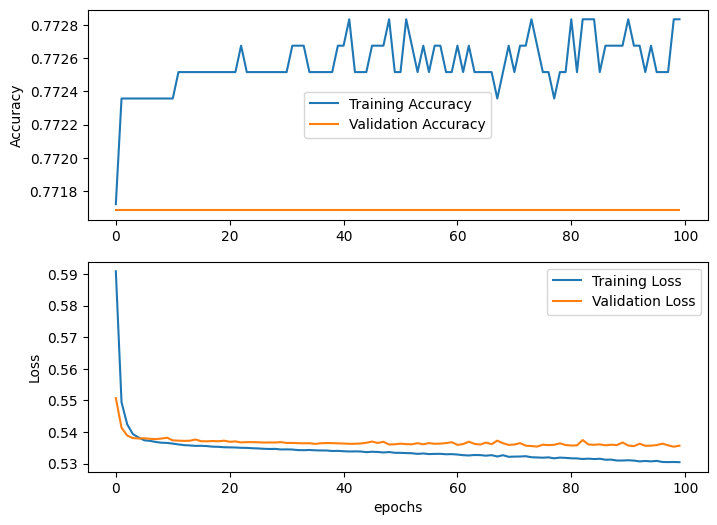

In [ ]:

print("DIAMOND ARCHITECTURE PERFORMANCE:")
print("=" * 50)

diamond_model = tf.keras.Sequential([
    layers.InputLayer(input_shape=(9,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

diamond_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    
# Train and get history for plotting
history = diamond_model.fit(x_train_scaled, y_train, epochs=100, verbose=0, validation_data=(x_val_scaled, y_val))
val_loss, val_acc = diamond_model.evaluate(x_val_scaled, y_val, verbose=0)
    

#recall

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

acc = history.history['accuracy']
loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

ax1.plot(acc, label='Training Accuracy')
ax1.plot(val_acc, label='Validation Accuracy')

ax2.plot(loss, label='Training Loss')
ax2.plot(val_loss, label='Validation Loss')

ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Loss')

ax2.set_xlabel('epochs')

ax1.legend()
ax2.legend()



print('-----')

print('\nEvaluative Metric')

y_pred_prob = diamond_model.predict(x_val_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

recall = recall_score(y_val, y_pred)
print(f'The Recall Score is {recall}')


---
### __<span style= "color: #92bbcaff;"> Hourglass Architecture </span>__ 

In [ ]:
print("HOURGLASS ARCHITECTURE PERFORMANCE:")
print("=" * 60)

# HOURGLASS ARCHITECTURE: Large → Small → Large
hourglass_model = tf.keras.Sequential([
    layers.InputLayer(input_shape=(9,)),
    # CONTRACTING PHASE: Large to Small
    layers.Dense(64, activation='relu'),   # Large start
    layers.Dense(32, activation='relu'),   # Contracting
    layers.Dense(16, activation='relu'),   # Smallest layer (bottleneck)
    # EXPANDING PHASE: Small to Large
    layers.Dense(32, activation='relu'),   # Expanding
    layers.Dense(64, activation='relu'),   # Large end
    layers.Dense(1, activation='sigmoid')  # Output
])

hourglass_model.compile(optimizer='adam', loss='binary_crossentropy', 
                        metrics=['accuracy', 'Precision', 'Recall'])

print("Hourglass Architecture Summary:")
print("Pattern: 64 → 32 → 16 → 32 → 64 (Contract then Expand)")
hourglass_model.summary()

# Train model
history = hourglass_model.fit(x_train_scaled, y_train, epochs=100, verbose=0, 
                             validation_data=(x_val_scaled, y_val),
                             batch_size=32)

# Get comprehensive metrics
y_pred_prob = hourglass_model.predict(x_val_scaled, verbose=0)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate ALL metrics
balanced_acc = balanced_accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, zero_division=0)
recall = recall_score(y_val, y_pred, zero_division=0)
f1 = f1_score(y_val, y_pred, zero_division=0)
val_loss, val_acc = hourglass_model.evaluate(x_val_scaled, y_val, verbose=0)

# Get confusion matrix
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

print("\n" + "=" * 50)
print("HOURGLASS ARCHITECTURE RESULTS:")
print("=" * 50)
print(f"Neuron Pattern: 64 → 32 → 16 → 32 → 64")
print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Precision: {precision:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f}")
print(f"Confusion Matrix: TP={tp}, FP={fp}, TN={tn}, FN={fn}")

# Plot Hourglass-specific training
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 8))

# Accuracy plot
ax1.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', linewidth=2)
ax1.set_ylabel('Accuracy')
ax1.set_title('Hourglass Architecture: Training Progress')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Loss plot
ax2.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
ax2.plot(history.history['val_loss'], label='Validation Loss', color='red', linewidth=2)
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epochs')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Architecture visualization
print("\n" + "=" * 40)
print("ARCHITECTURE COMPARISON:")
print("=" * 40)
print("HOURGLASS: 64 → 32 → 16 → 32 → 64 (Contract then Expand)")
print("DIAMOND:   16 → 32 → 64 → 32 → 16 (Expand then Contract)")
print("=" * 40)

# Export for academic table
print("\nCOPY FOR ACADEMIC TABLE:")
print(f"hourglass | [64, 32, 16, 32, 64] | {balanced_acc:.4f} | {precision:.4f} | {recall:.4f} | {f1:.4f}")

In [ ]:

print("HOURGLASS ARCHITECTURE PERFORMANCE:")
print("=" * 50)

hour_glass_model = tf.keras.Sequential([
    layers.InputLayer(input_shape=(9,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

hour_glass_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    
# Train and get history for plotting
history = hour_glass_model.fit(x_train_scaled, y_train, epochs=100, validation_data=(x_val_scaled, y_val))
val_loss, val_acc = hour_glass_model.evaluate(x_val_scaled, y_val, verbose=0)
   

print(f'Final Validation Accuracy: {val_acc:.4f}')
print(f'Final Validation Loss: {val_loss:.4f}')

#plotting
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

acc = history.history['accuracy']
loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

ax1.plot(acc, label='Training Accuracy')
ax1.plot(val_acc, label='Validation Accuracy')

ax2.plot(loss, label='Training Loss')
ax2.plot(val_loss, label='Validation Loss')

ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Loss')

ax2.set_xlabel('epochs')

ax1.legend()
ax2.legend()


#recall
print('-----')

print('\nEvaluative Metric')

y_pred_prob = hour_glass_model.predict(x_val_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

recall = recall_score(y_val, y_pred)
print(f'The Recall Score is {recall}')

---
### __<span style= "color: #92bbcaff;"> Conclusion </span>__ 

c:\Users\kojus\anaconda3\envs\ML_DM\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


pyr_64_32          | layers=[64, 32]        | val_acc=0.7717 | val_loss=0.5380 | params=2753 | time=126.8s
pyr_64_16          | layers=[64, 16]        | val_acc=0.7717 | val_loss=0.5363 | params=1697 | time=121.1s
pyr_64_16          | layers=[64, 16]        | val_acc=0.7717 | val_loss=0.5363 | params=1697 | time=121.1s
pyr_32_16          | layers=[32, 16]        | val_acc=0.7717 | val_loss=0.5390 | params=865 | time=106.8s
pyr_32_16          | layers=[32, 16]        | val_acc=0.7717 | val_loss=0.5390 | params=865 | time=106.8s
pyr_64_32_16       | layers=[64, 32, 16]    | val_acc=0.7717 | val_loss=0.5384 | params=3265 | time=111.3s

Top architectures by validation accuracy:
- pyr_64_32: val_acc=0.7717, val_loss=0.5380, params=2753
- pyr_64_16: val_acc=0.7717, val_loss=0.5363, params=1697
- pyr_32_16: val_acc=0.7717, val_loss=0.5390, params=865
- pyr_64_32_16: val_acc=0.7717, val_loss=0.5384, params=3265
pyr_64_32_16       | layers=[64, 32, 16]    | val_acc=0.7717 | val_loss=0.5384 | pa

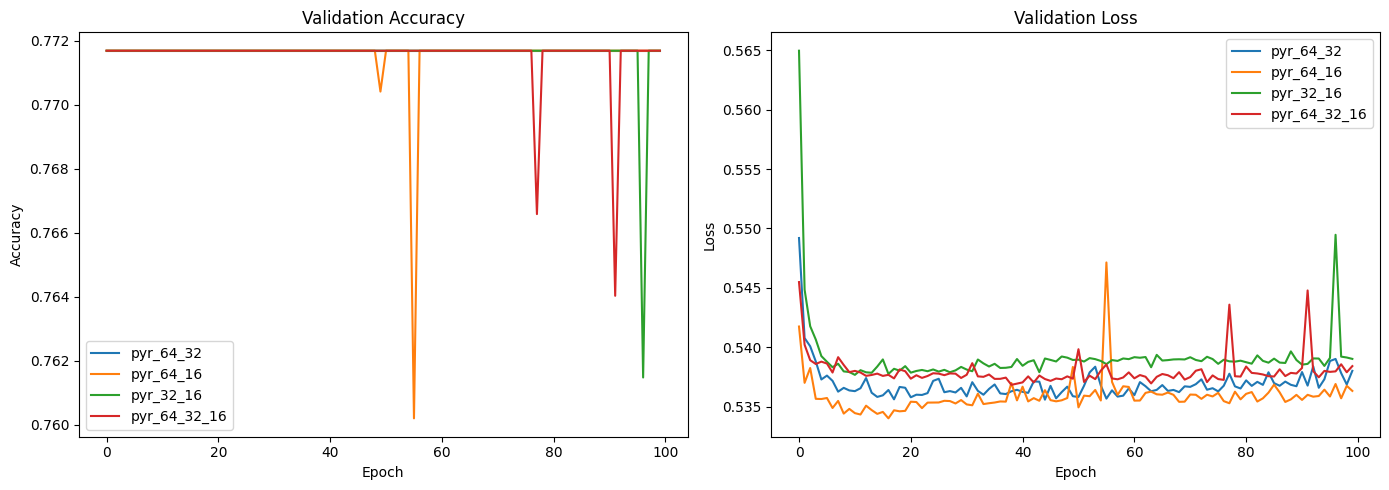


Summary:
name               layers             val_acc  val_loss  train_acc params   time_s 
pyr_64_32          [64, 32]           0.7717   0.5380    0.7722    2753     126.8  
pyr_64_16          [64, 16]           0.7717   0.5363    0.7728    1697     121.1  
pyr_32_16          [32, 16]           0.7717   0.5390    0.7725    865      106.8  
pyr_64_32_16       [64, 32, 16]       0.7717   0.5384    0.7724    3265     111.3  


In [ ]:
# --- Pyramid architectures test (appended corrected cell) ---
# Builds several pyramid-shaped networks, trains them on scaled data, stores histories, and plots comparison.
import time
import matplotlib.pyplot as plt

pyramids = {
    'pyr_64_32': [64, 32],
    'pyr_64_16': [64, 16],
    'pyr_32_16': [32, 16],
    'pyr_64_32_16': [64, 32, 16]
}

results = []

# Ensure scaled arrays exist
if 'x_train_scaled' not in globals() or 'x_val_scaled' not in globals():
    raise RuntimeError('Scaled arrays x_train_scaled / x_val_scaled not found. Run preprocessing cells first.')

for name, layers in pyramids.items():
    input_dim = x_train_scaled.shape[1]
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(input_dim,)))
    for units in layers:
        model.add(tf.keras.layers.Dense(units, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

    t0 = time.time()
    history = model.fit(x_train_scaled, y_train, epochs=100, validation_data=(x_val_scaled, y_val), verbose=0)
    t_elapsed = time.time() - t0

    train_loss, train_acc = model.evaluate(x_train_scaled, y_train, verbose=0)
    val_loss, val_acc = model.evaluate(x_val_scaled, y_val, verbose=0)

    results.append({
        'name': name,
        'layers': layers,
        'model': model,
        'history': history.history,
        'train_acc': train_acc,
        'train_loss': train_loss,
        'val_acc': val_acc,
        'val_loss': val_loss,
        'time_sec': t_elapsed,
        'params': model.count_params()
    })

    print(f"{name:<18} | layers={str(layers):15} | val_acc={val_acc:.4f} | val_loss={val_loss:.4f} | params={model.count_params()} | time={t_elapsed:.1f}s")

# Sort by val accuracy
results_sorted = sorted(results, key=lambda r: r['val_acc'], reverse=True)

print('\nTop architectures by validation accuracy:')
for r in results_sorted:
    print(f"- {r['name']}: val_acc={r['val_acc']:.4f}, val_loss={r['val_loss']:.4f}, params={r['params']}")

# Plot validation accuracy and loss for comparison
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
for r in results:
    plt.plot(r['history'].get('val_accuracy', []), label=r['name'])
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
for r in results:
    plt.plot(r['history'].get('val_loss', []), label=r['name'])
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Prepare a concise summary table
print('\nSummary:')
print(f"{'name':<18} {'layers':<18} {'val_acc':<8} {'val_loss':<9} {'train_acc':<9} {'params':<8} {'time_s':<7}")
for r in results:
    print(f"{r['name']:<18} {str(r['layers']):<18} {r['val_acc']:<8.4f} {r['val_loss']:<9.4f} {r['train_acc']:<9.4f} {r['params']:<8} {r['time_sec']:<7.1f}")


In [ ]:
# Helper: show confusion matrix and classification report for a model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


def show_confusion(model, X, y_true, labels=[0,1], title_suffix=''):
    """
    Display confusion matrix and classification report for a trained model.

    model: a Keras model or any object with a predict / predict_proba method
    X: features (numpy array or DataFrame)
    y_true: true labels (array-like)
    labels: list of label values for display
    title_suffix: optional suffix added to plot titles
    """
    # Resolve X to numpy
    X_np = X.values if hasattr(X, 'values') else np.asarray(X)

    # Try predict_proba -> predict class with threshold 0.5; fall back to predict
    try:
        if hasattr(model, 'predict_proba'):
            probs = model.predict_proba(X_np)
            # If returns (n_samples, 2) for binary, take column 1
            if probs.ndim == 2 and probs.shape[1] > 1:
                y_pred = (probs[:, 1] >= 0.5).astype(int)
            else:
                y_pred = (probs >= 0.5).astype(int).reshape(-1)
        else:
            preds = model.predict(X_np)
            # Keras models often return shape (n,1) for binary
            y_pred = np.asarray(preds).reshape(-1)
            # If continuous probabilities, threshold at 0.5
            if y_pred.dtype.kind in 'f':
                y_pred = (y_pred >= 0.5).astype(int)
            else:
                y_pred = y_pred.astype(int)
    except Exception as e:
        # Last resort: try calling predict on CPU-friendly copy
        try:
            preds = model.predict(X_np)
            y_pred = np.asarray(preds).reshape(-1)
            if y_pred.dtype.kind in 'f':
                y_pred = (y_pred >= 0.5).astype(int)
            else:
                y_pred = y_pred.astype(int)
        except Exception as e2:
            raise RuntimeError(f'Could not obtain predictions from model: {e}; fallback: {e2}')

    cm = confusion_matrix(y_true, y_pred, labels=labels)

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix' + (f" - {title_suffix}" if title_suffix else ''))
    plt.show()

    print('Classification report:')
    print(classification_report(y_true, y_pred, digits=4))


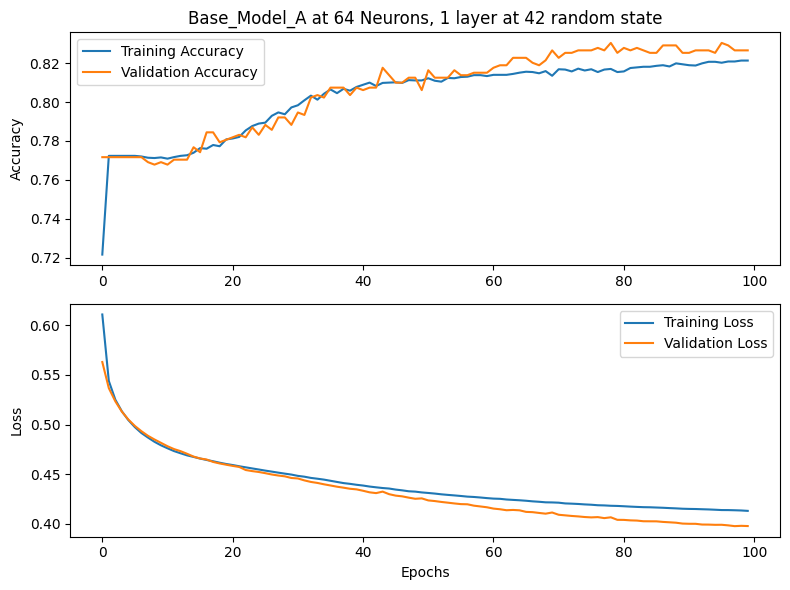

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
The Accuracy Score is 0.8265The Accuracy Score is 0.8265
The Recall Score is 0.4190
The F1 Score is 0.5245
The Precision Score is 0.7009

The Recall Score is 0.4190
The F1 Score is 0.5245
The Precision Score is 0.7009


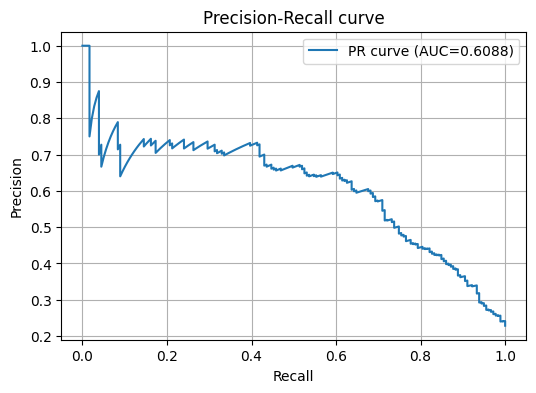

Confusion matrix (validation):


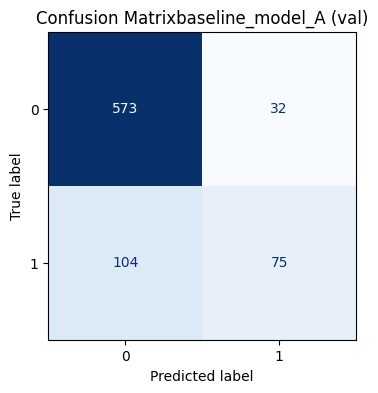


Classification report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.89       605
           1       0.70      0.42      0.52       179

    accuracy                           0.83       784
   macro avg       0.77      0.68      0.71       784
weighted avg       0.81      0.83      0.81       784


Confusion matrix (test):


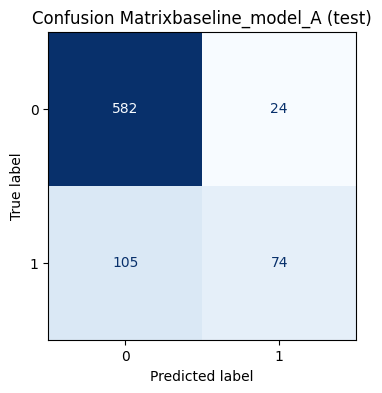


Classification report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       606
           1       0.76      0.41      0.53       179

    accuracy                           0.84       785
   macro avg       0.80      0.69      0.72       785
weighted avg       0.83      0.84      0.82       785

